Mehmet Bugra Gunaydin

100854077

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
#Machine Learning Libraries
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
data = pd.read_csv('BreastCancerDataset.csv')

In [5]:
data.head()

id diagnosis          radius_mean         texture_mean  \
0  87139402         B                12.32                12.39   
1   8910251         B                10.60                18.95   
2    905520         B                11.04                16.83   
3    868871         B                11.28                13.39   
4   9012568         B                15.19                13.21   

        perimeter_mean            area_mean      smoothness_mean  \
0                78.85               464.10                 0.10   
1                69.28               346.40                 0.10   
2                70.92               373.20                 0.11   
3                73.00               384.80                 0.12   
4                97.65               711.80                 0.08   

      compactness_mean       concavity_mean          points_mean  ...  \
0                 0.07                 0.04                 0.04  ...   
1                 0.11                 0.06                 0.03  ...   
2                 0.08                 0.03                 0.02  ...   
3                 0.11                 0.05                 0.05  ...   
4                 0.07                 0.03                 0.03  ...   

          radius_worst        texture_worst      perimeter_worst  \
0                13.50                15.64                86.97   
1                11.88                22.94                78.28   
2                12.41                26.44                79.93   
3                11.92                15.77                76.53   
4                16.20                15.73               104.50   

            area_worst     smoothness_worst    compactness_worst  \
0               549.10                 0.14                 0.13   
1               424.80                 0.12                 0.25   
2               471.40                 0.14                 0.15   
3               434.00                 0.14                 0.18   
4               819.10                 0.11                 0.17   

       concavity_worst         points_worst       symmetry_worst  \
0                 0.12                 0.09                 0.28   
1                 0.19                 0.08                 0.29   
2                 0.11                 0.07                 0.30   
3                 0.09                 0.09                 0.21   
4                 0.14                 0.08                 0.25   

       dimension_worst  
0                 0.07  
1                 0.08  
2                 0.08  
3                 0.07  
4                 0.07  

[5 rows x 32 columns]

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [7]:
data.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

There is no empty/null values, so I have a complete dataset

id is a numerical value but doesn't represent any importance to my analysis. It is only an identifier of the sample, therefore dropping it will simplify my data.

In [8]:
data.drop(columns = 'id', inplace = True)

                                             |                                             | [  0%]   00:00 ->…


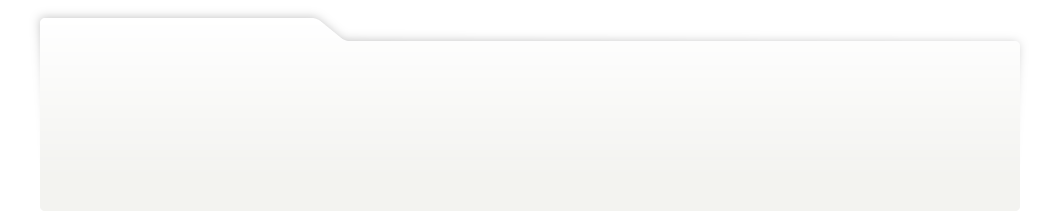
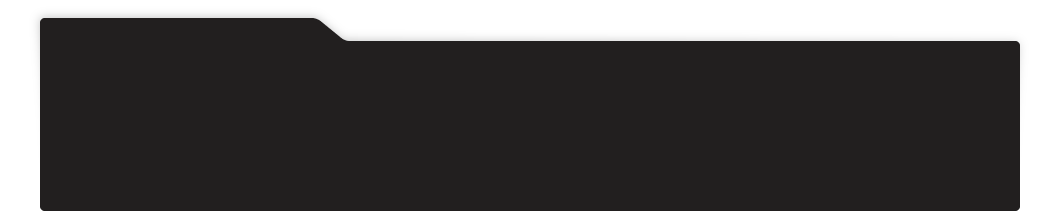
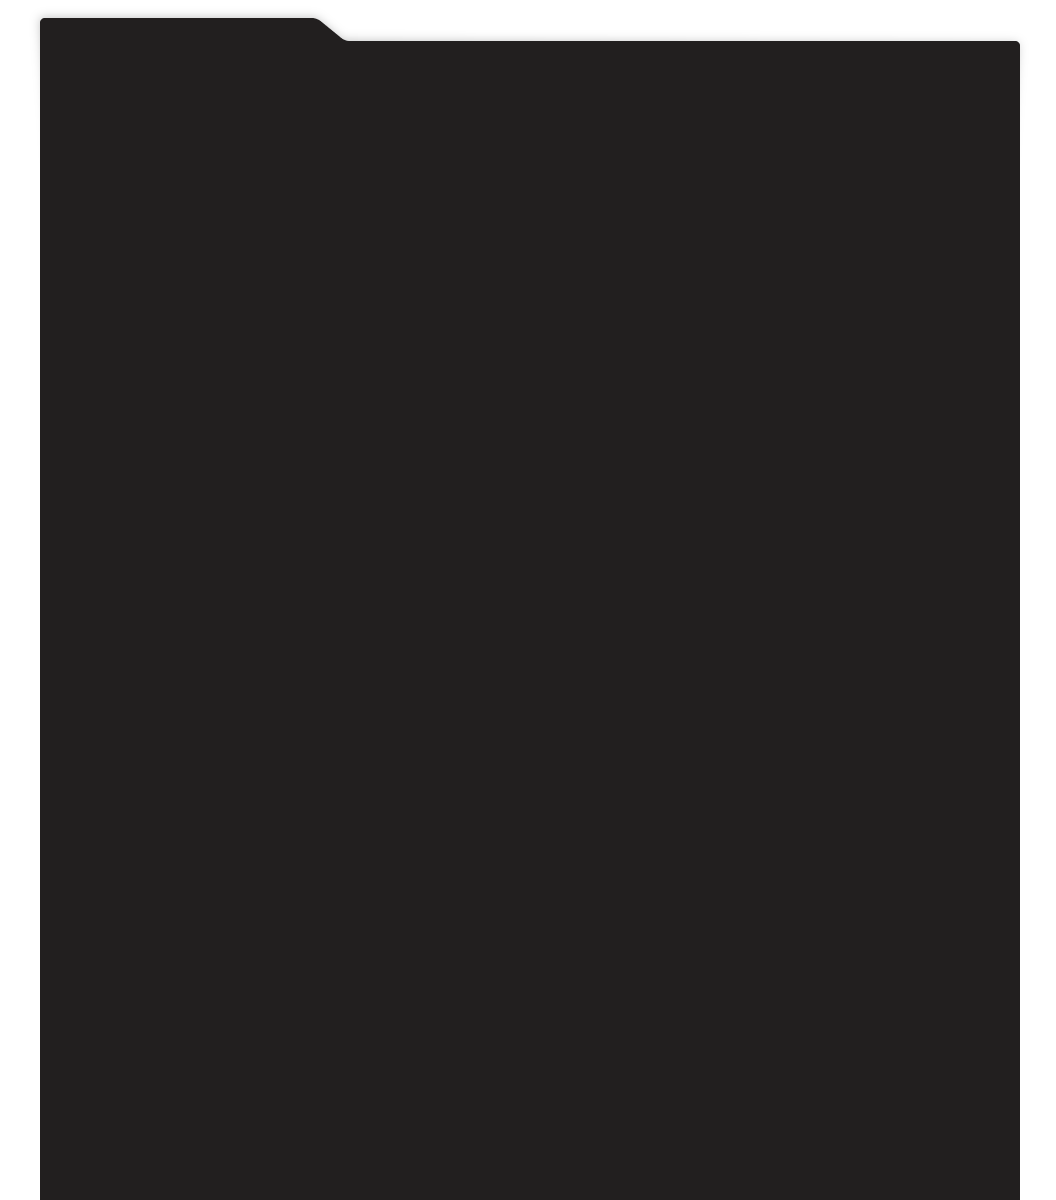
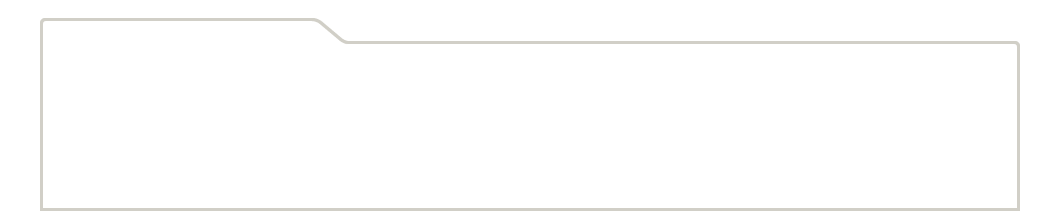
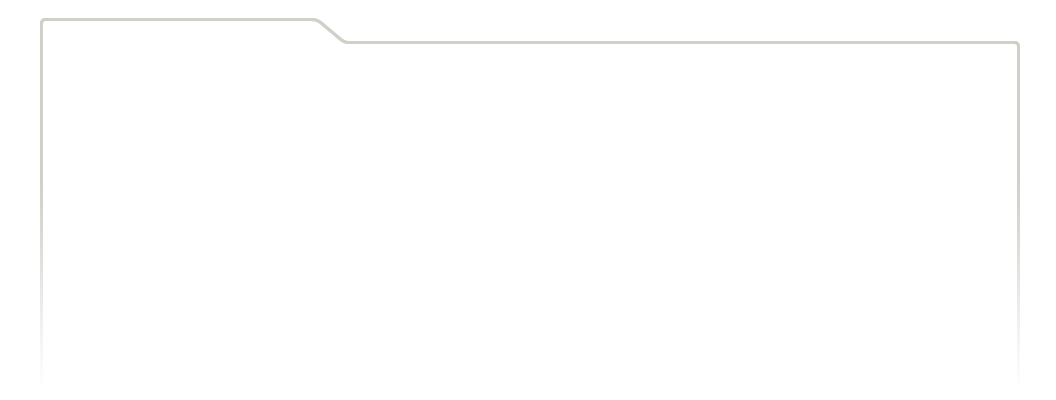
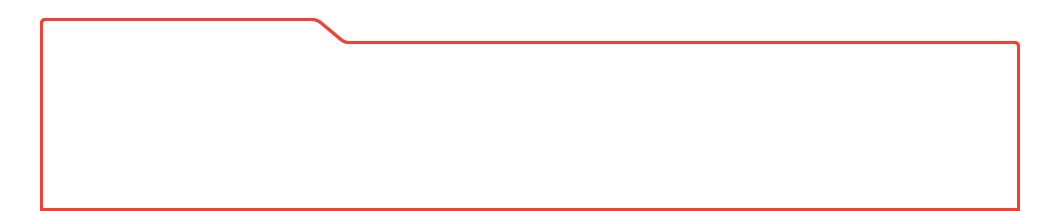
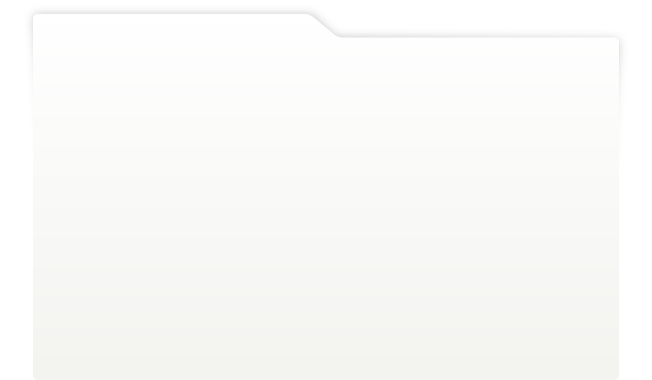
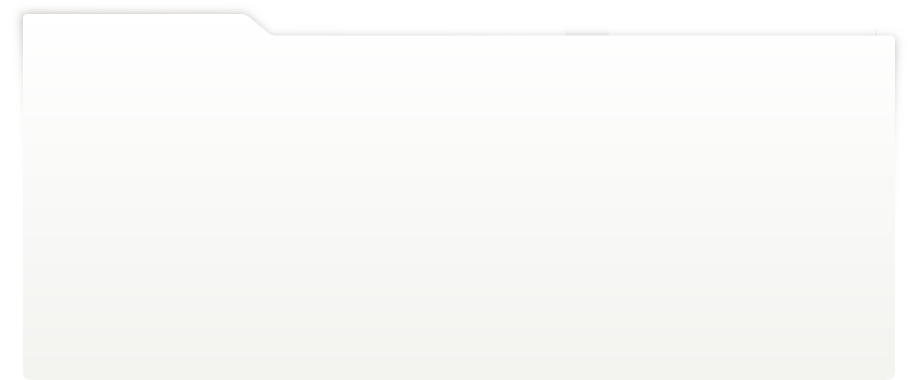
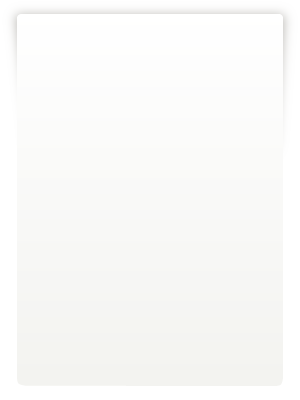
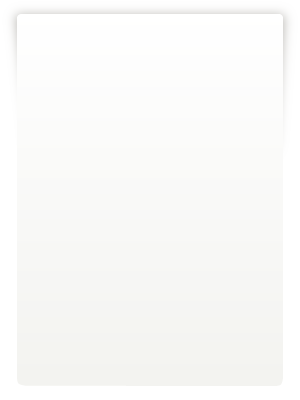
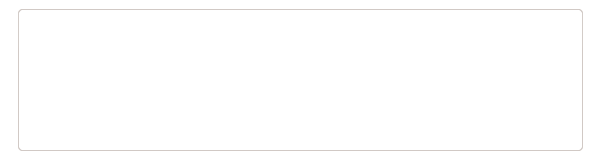
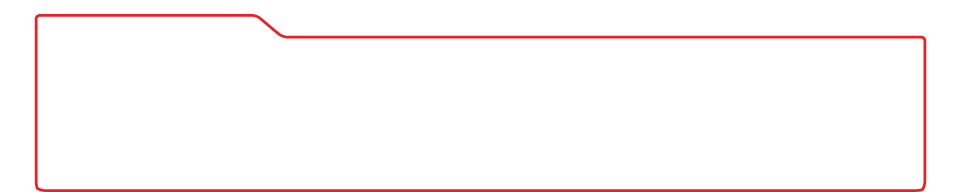
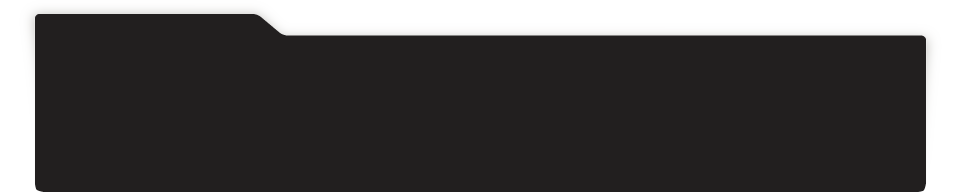
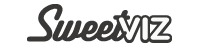
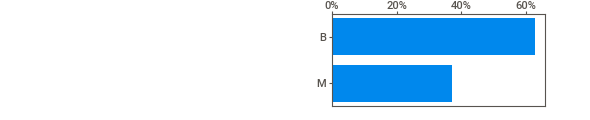
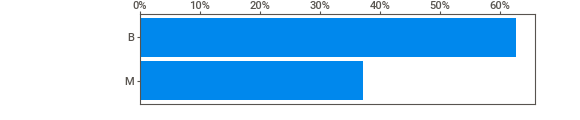
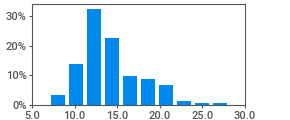
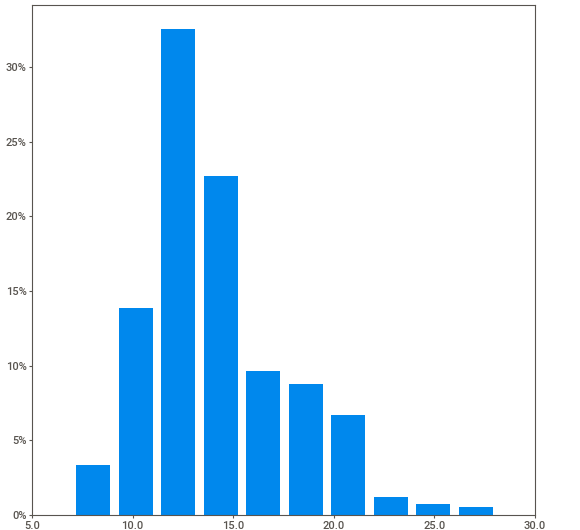
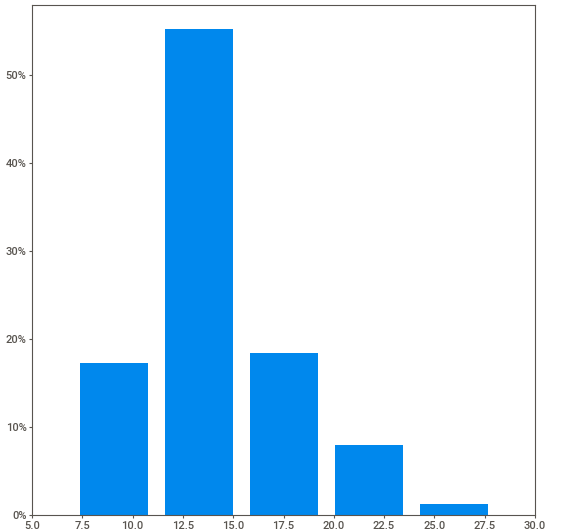
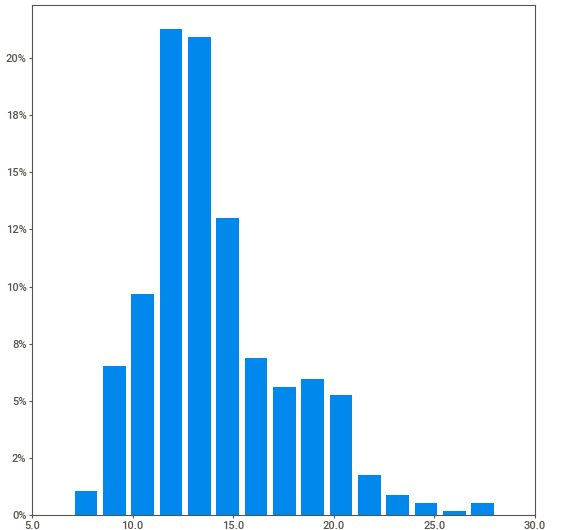
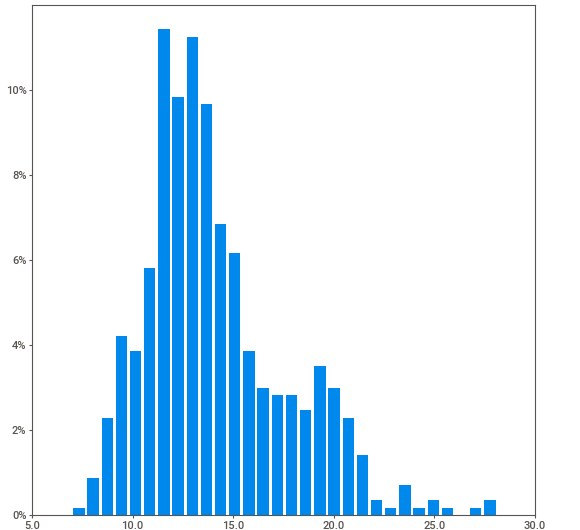
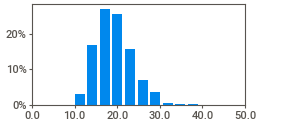
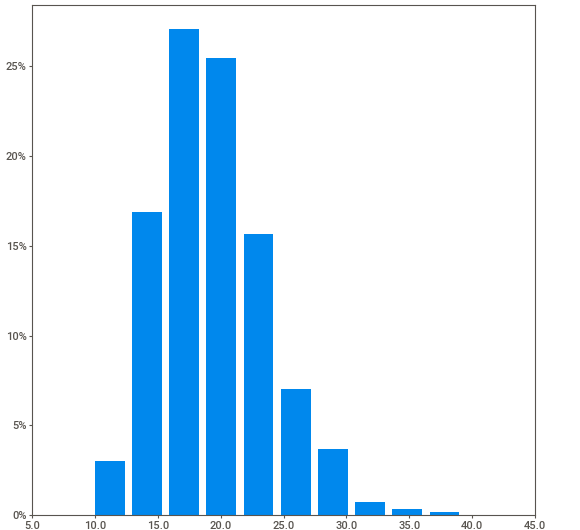
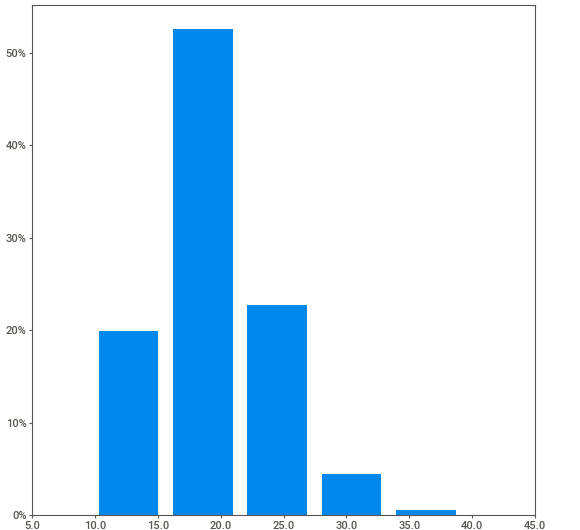
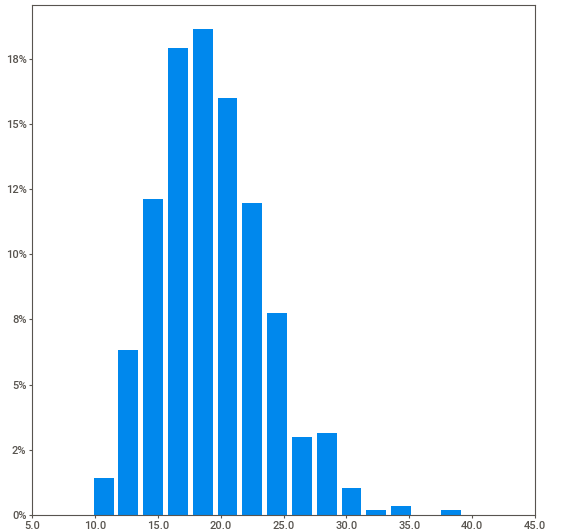
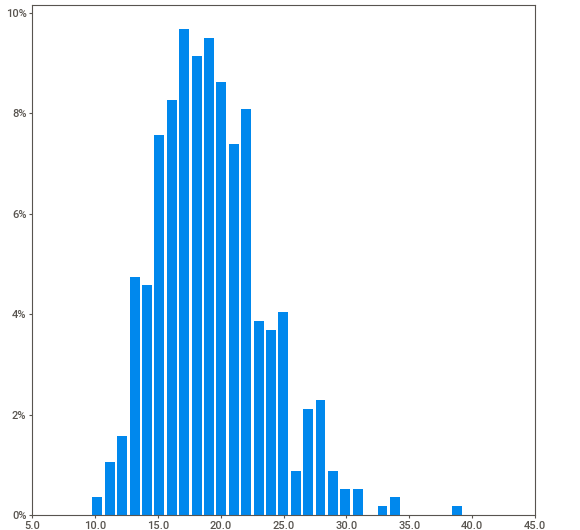
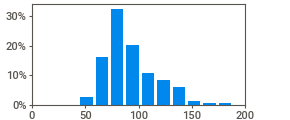
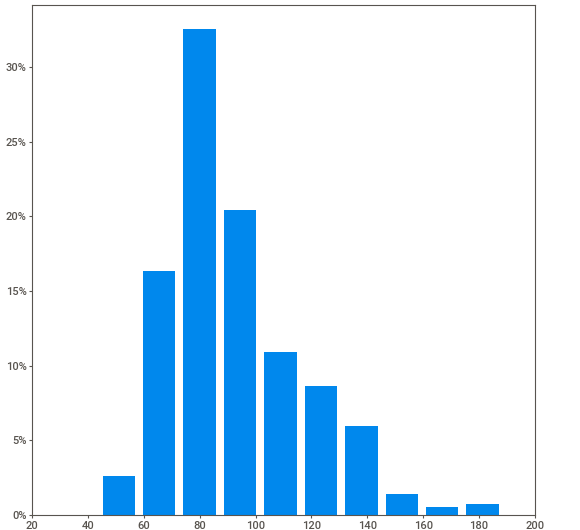
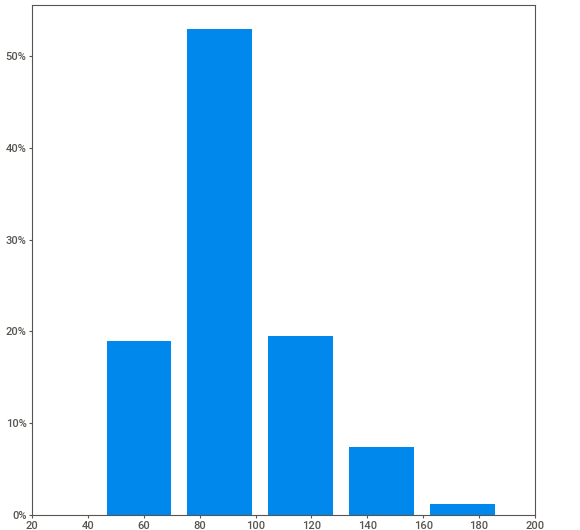
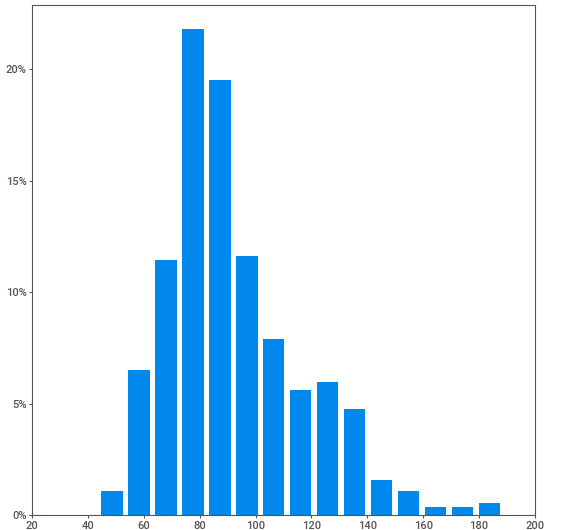
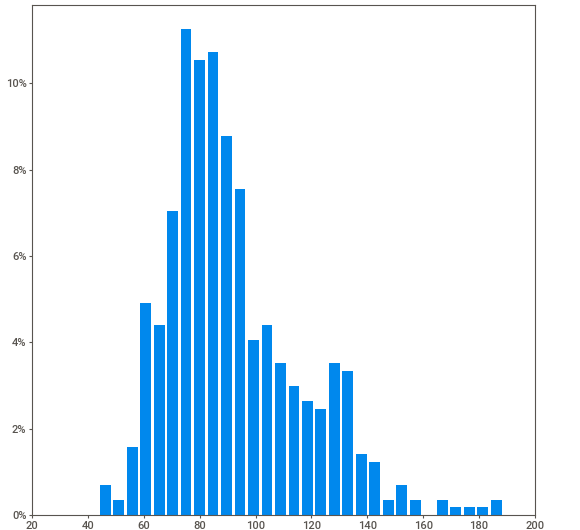
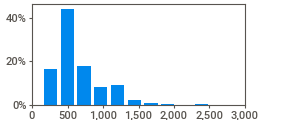
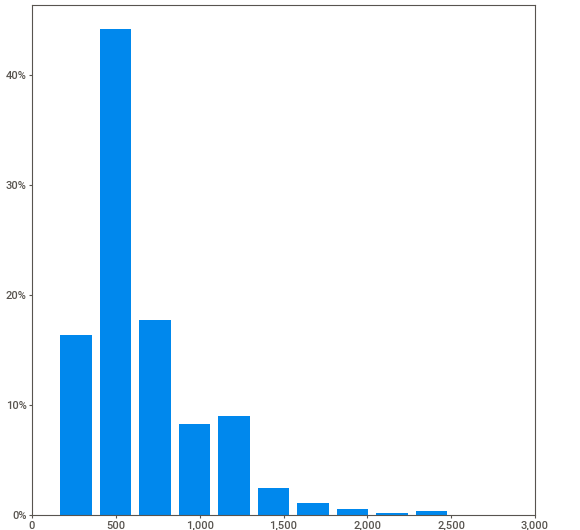
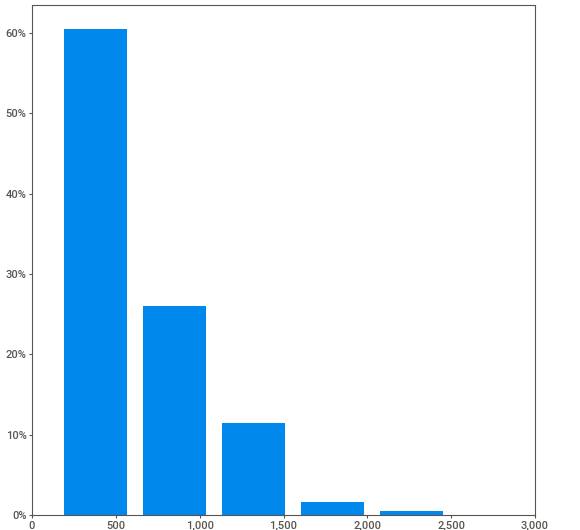
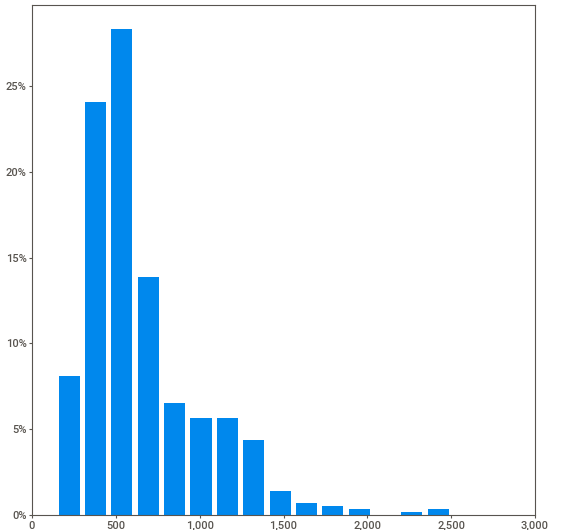
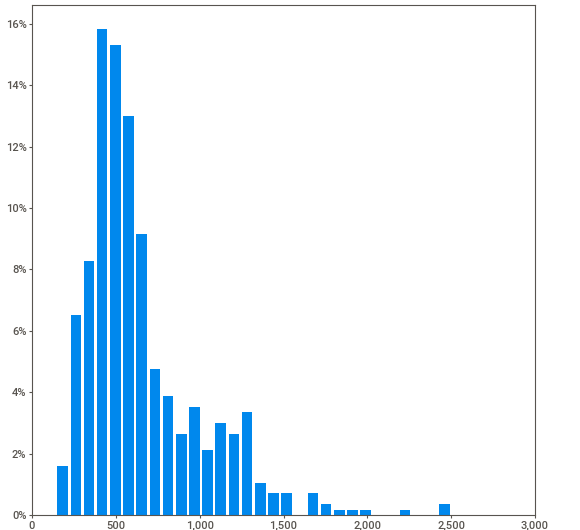
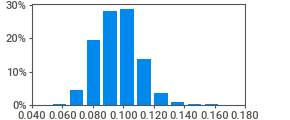
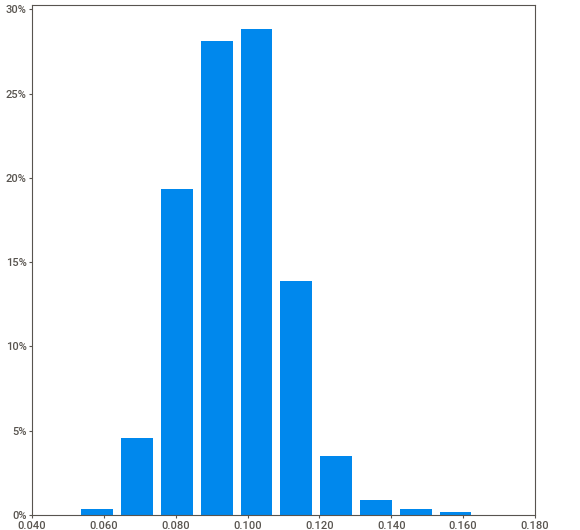
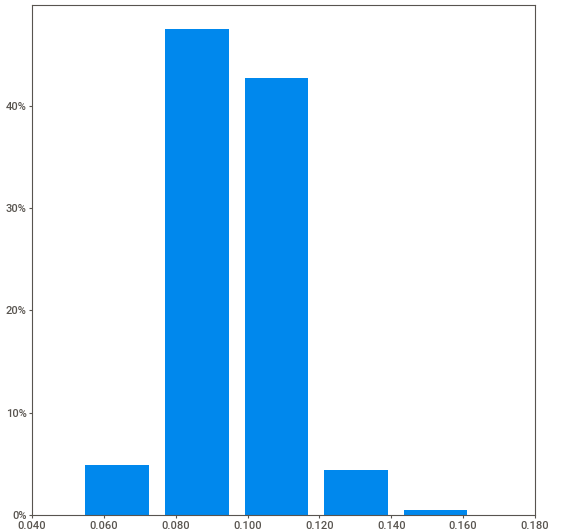
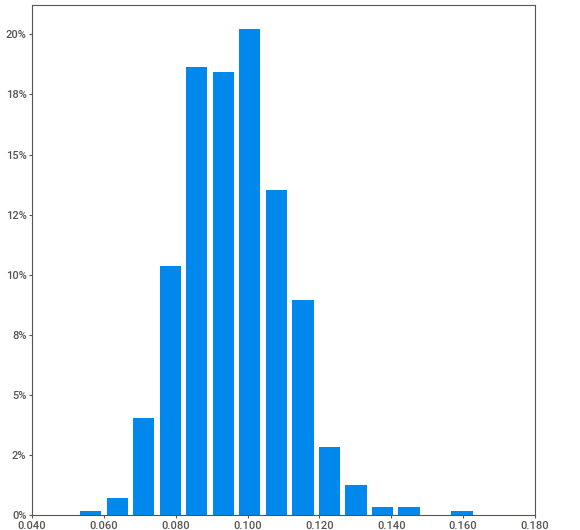
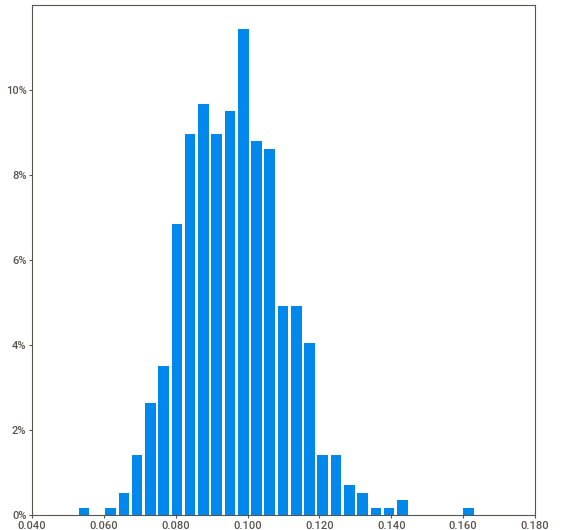
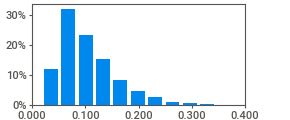
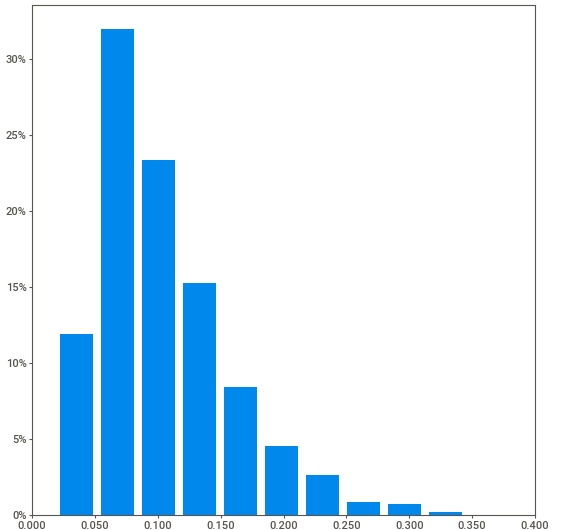
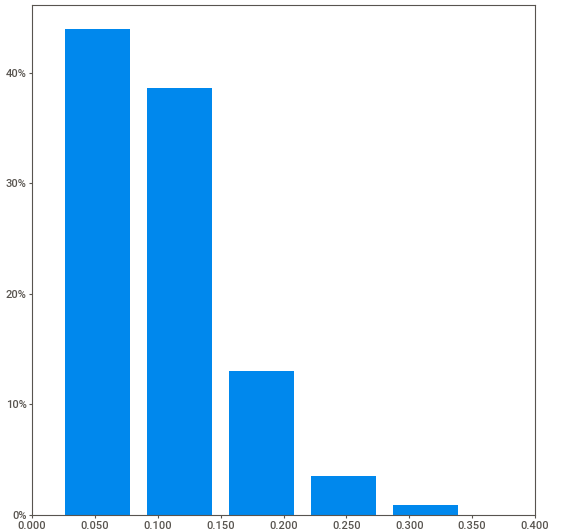
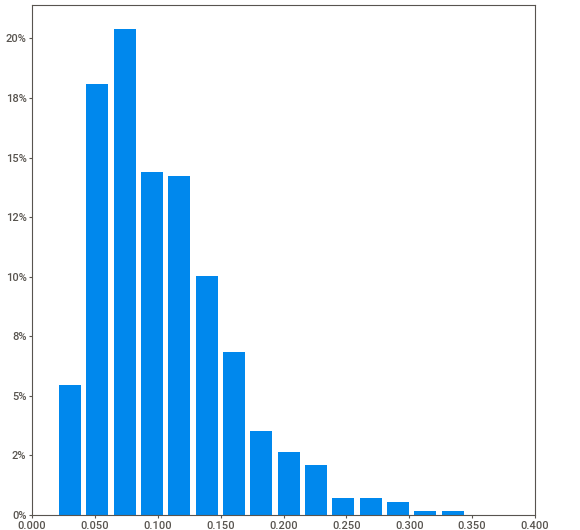
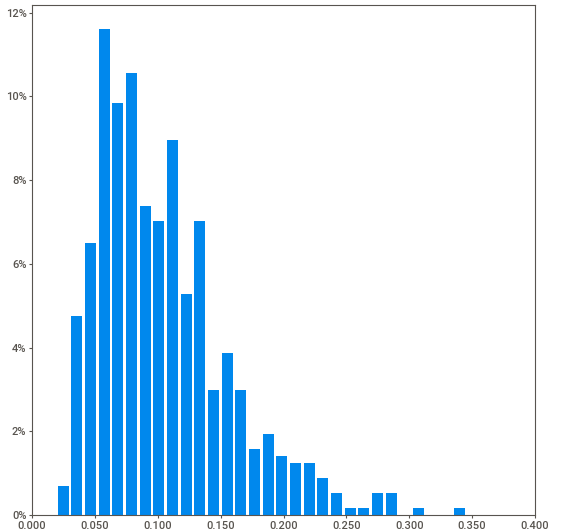
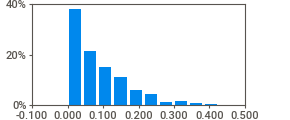
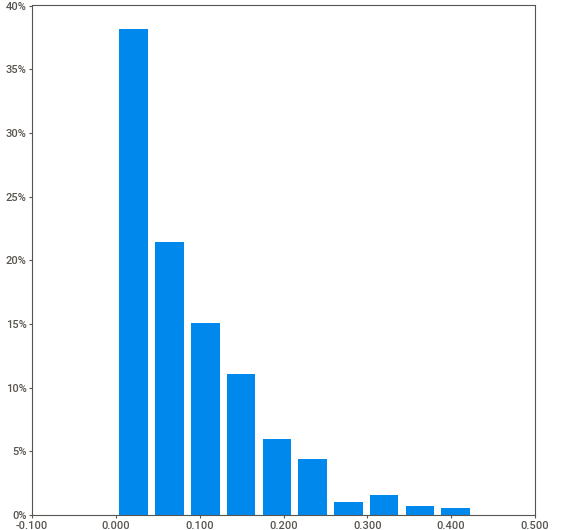
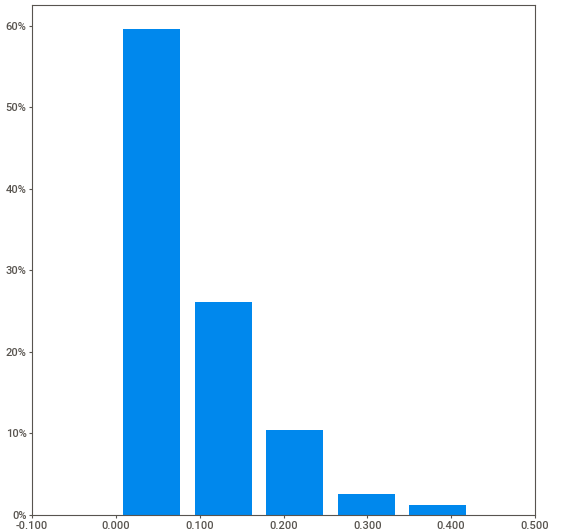
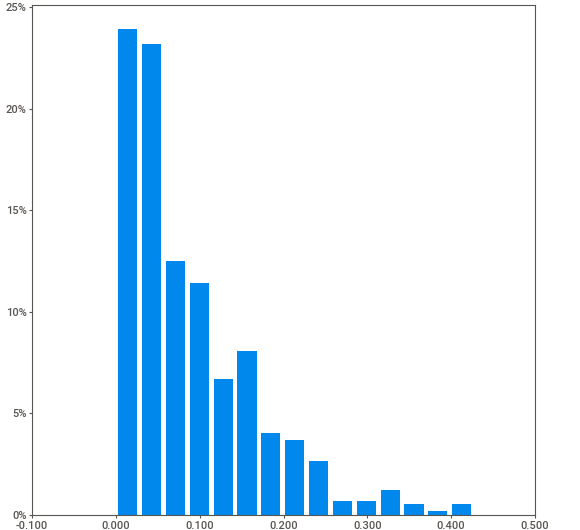
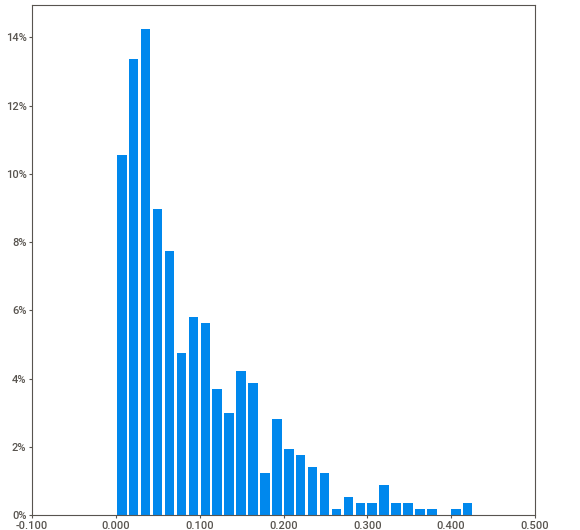
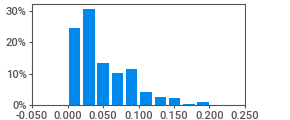
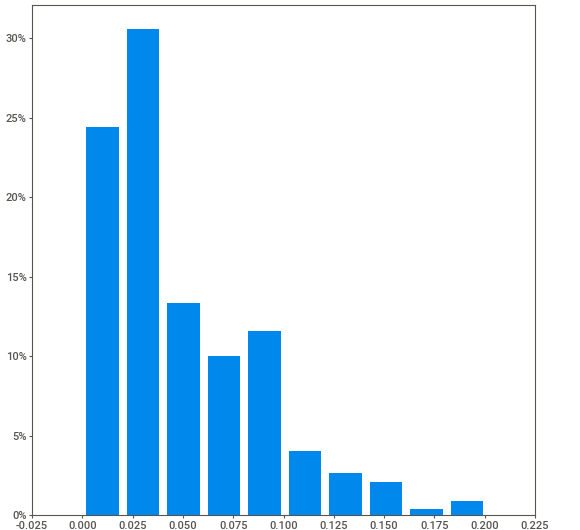
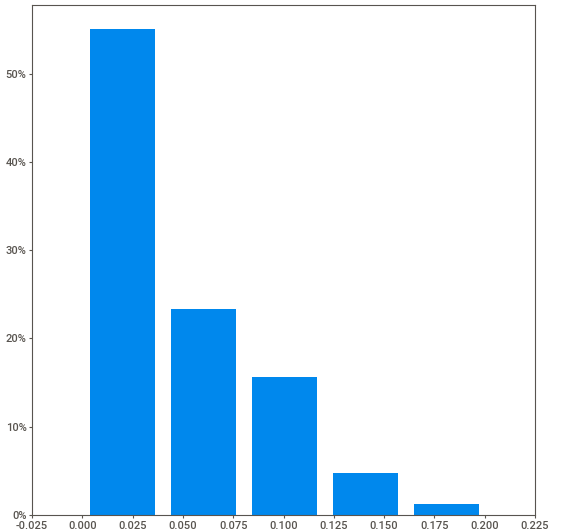
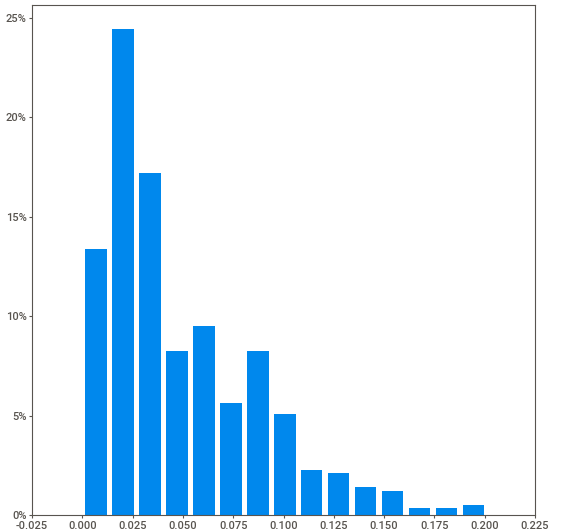
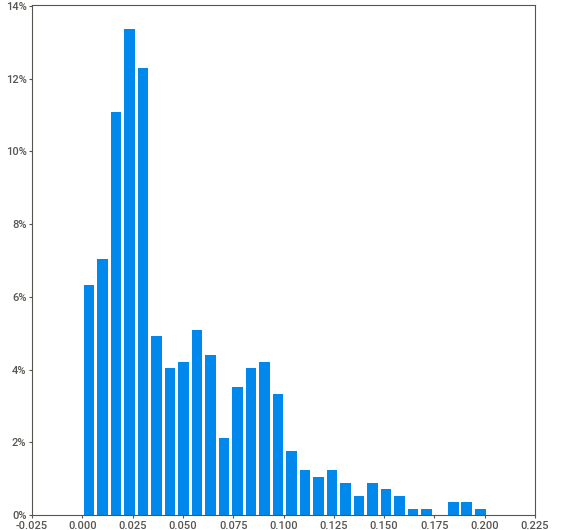
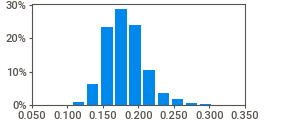
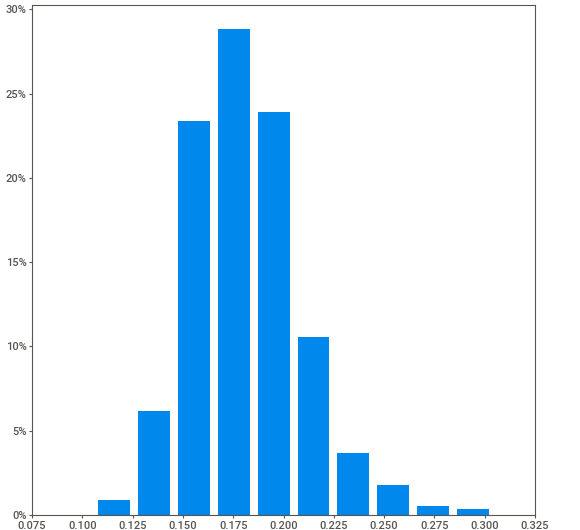
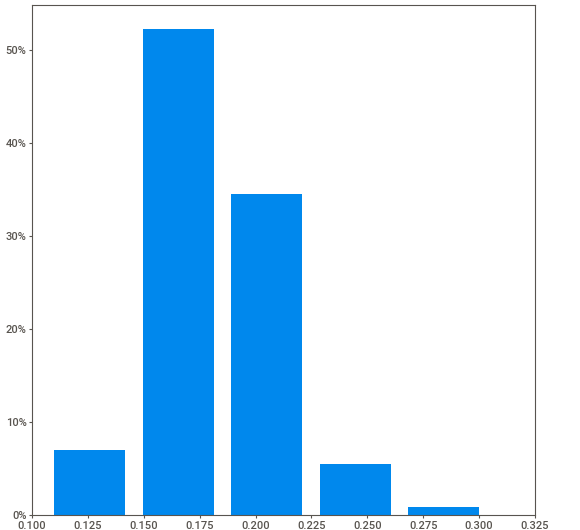
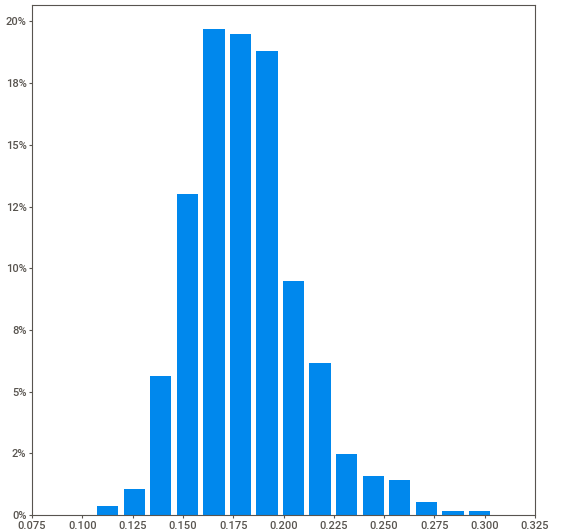
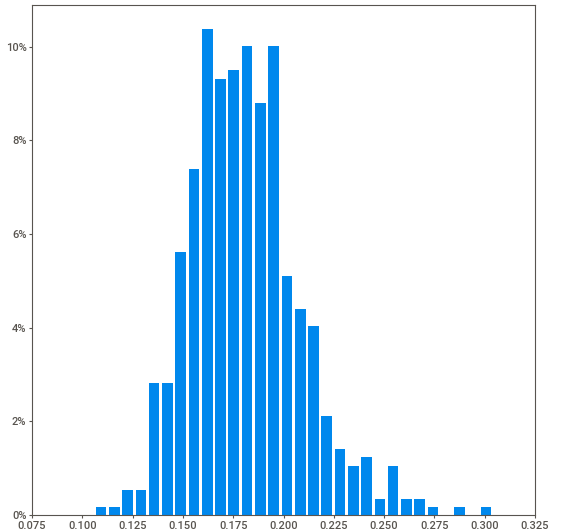
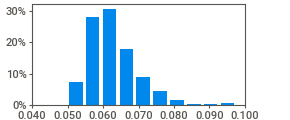
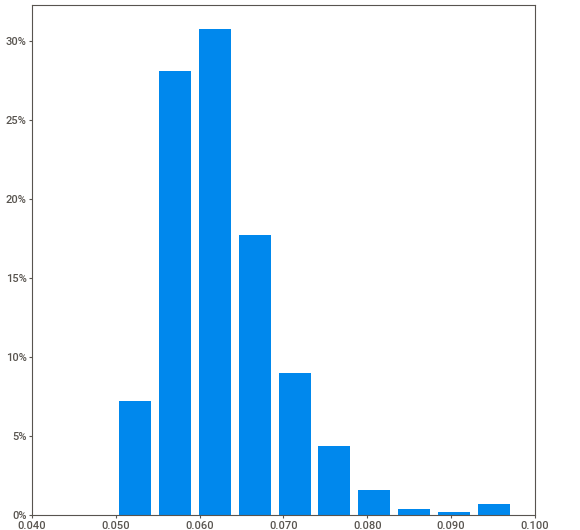
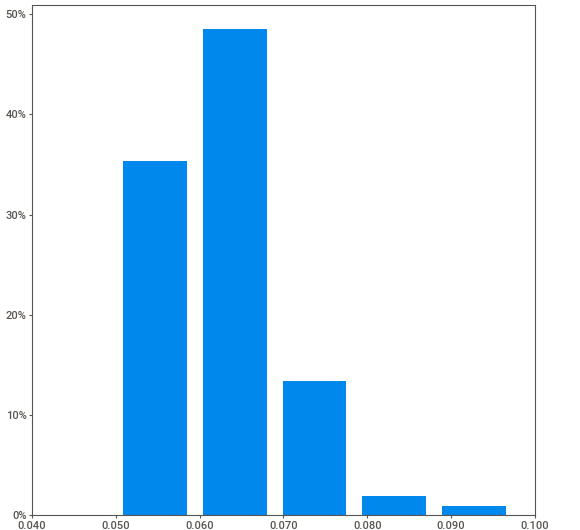
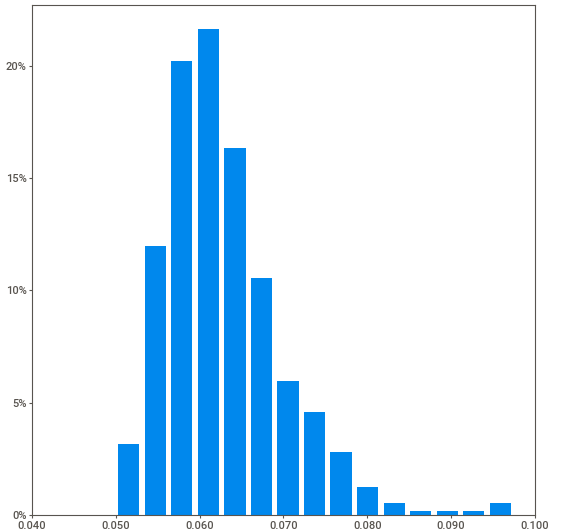
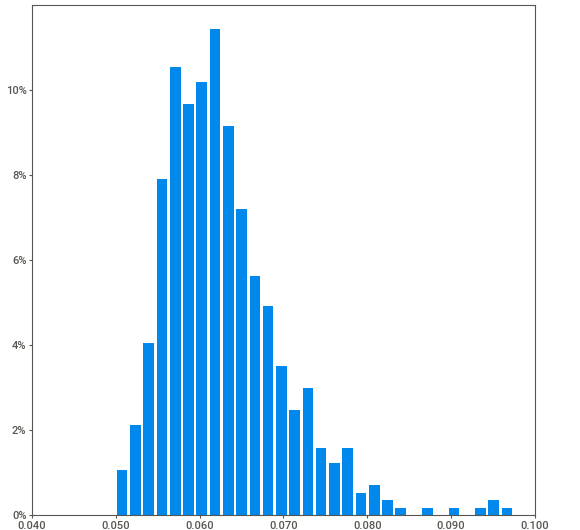
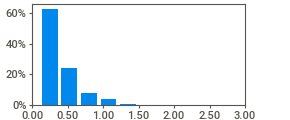
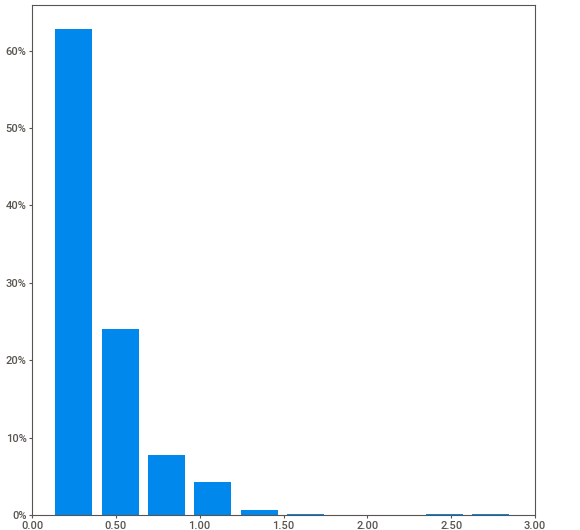
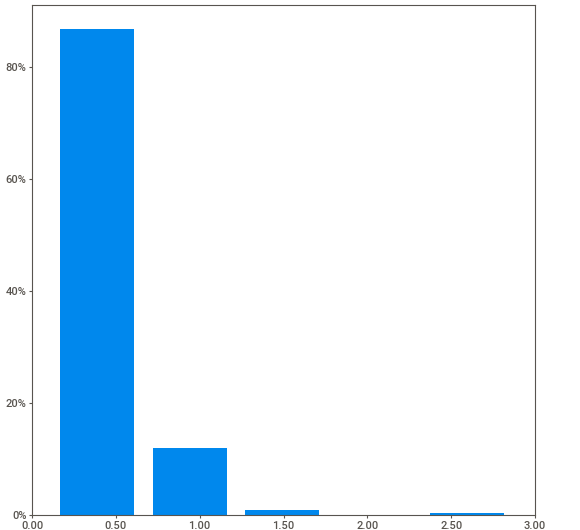
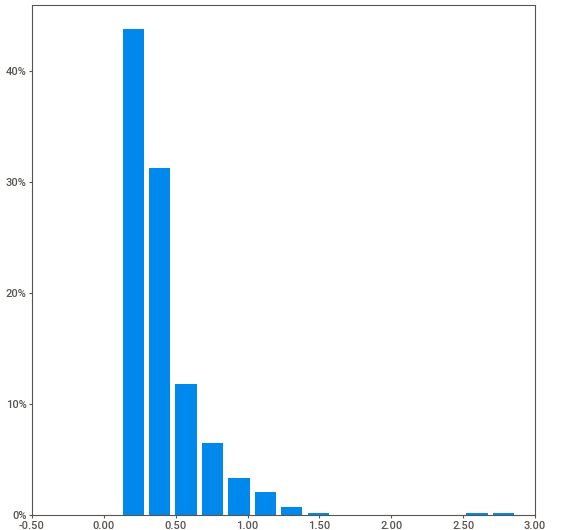
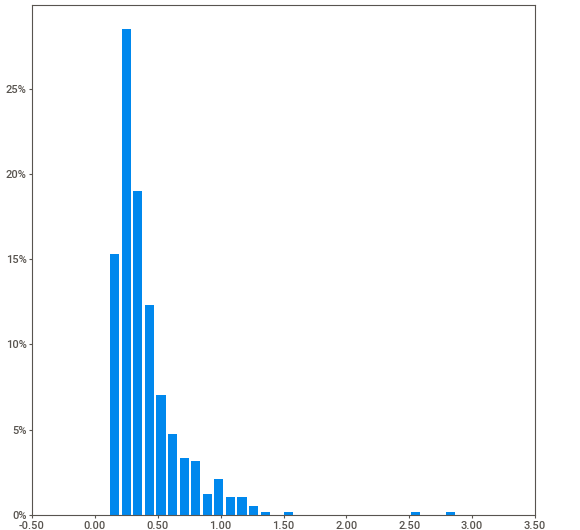
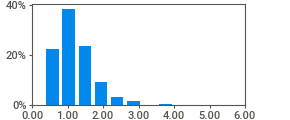
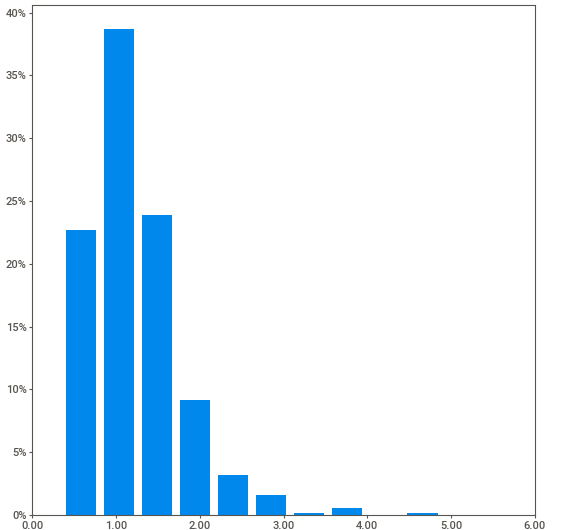
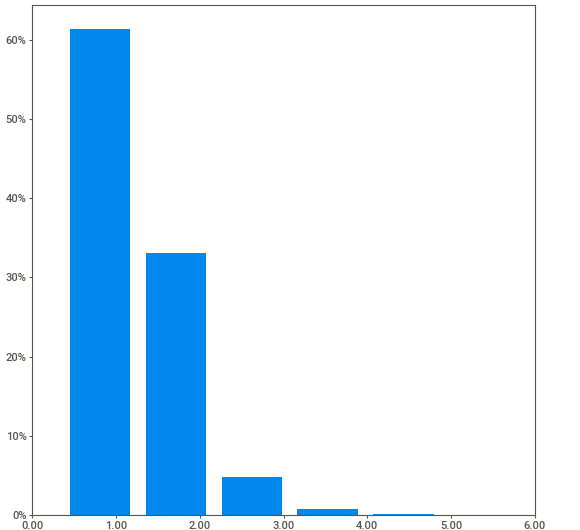
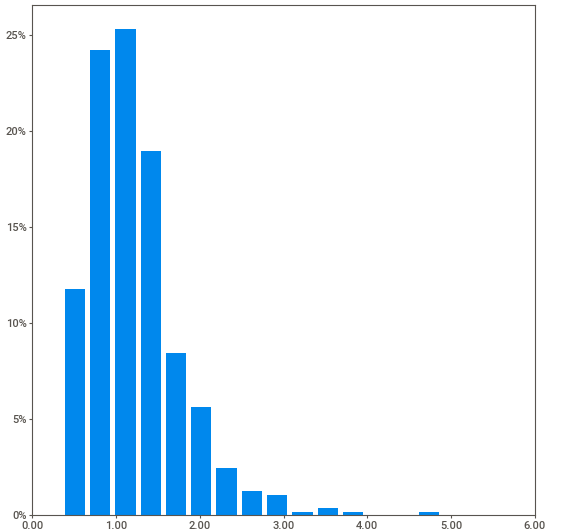
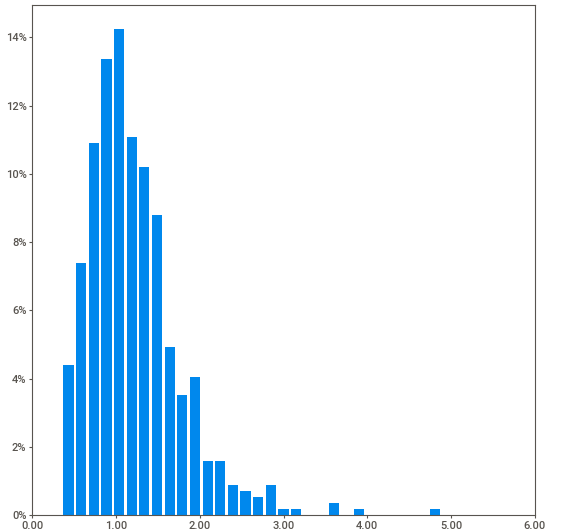
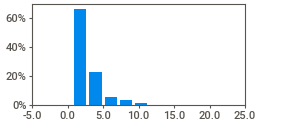
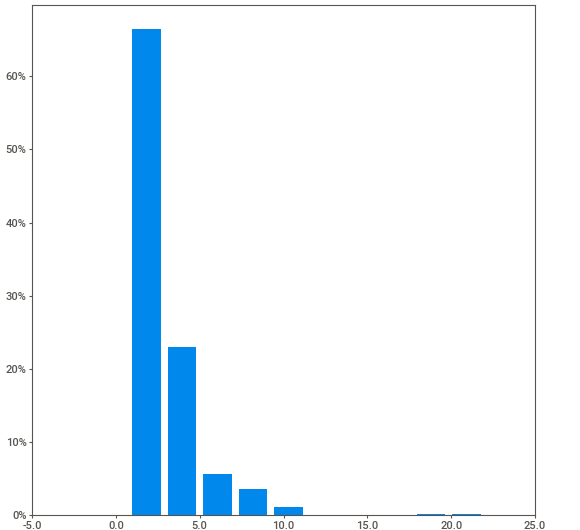
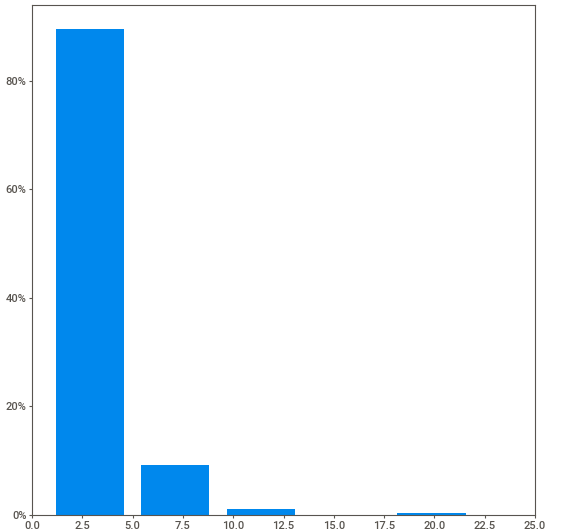
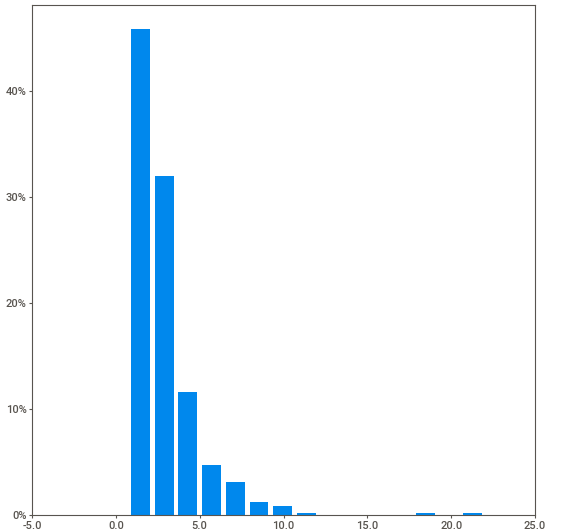
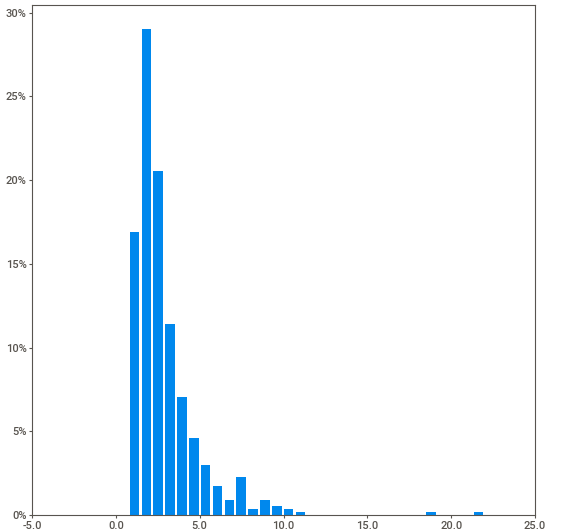
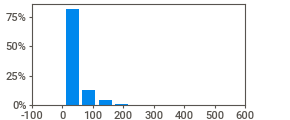
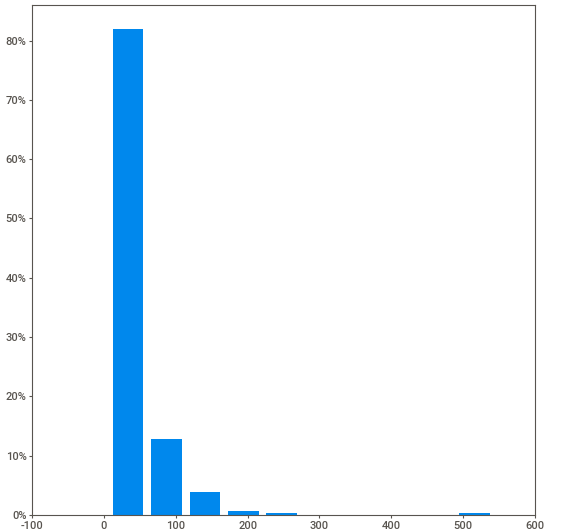
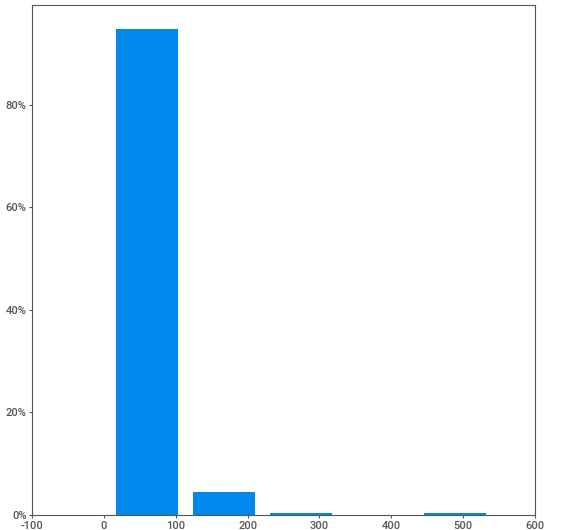
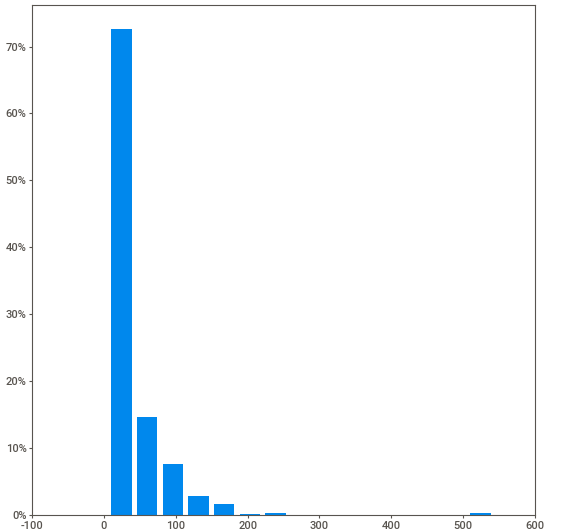
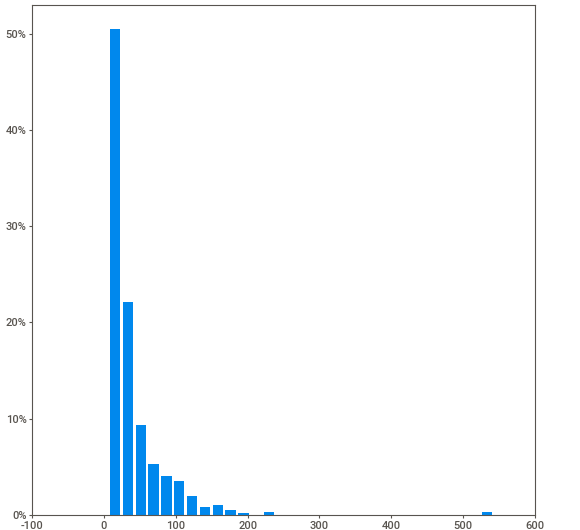
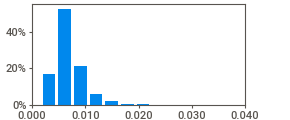
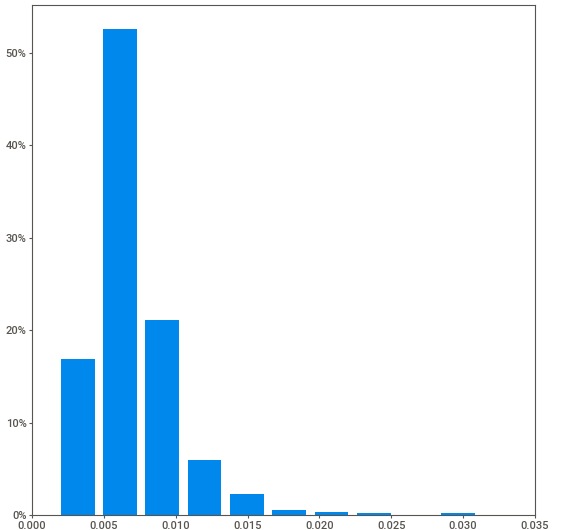
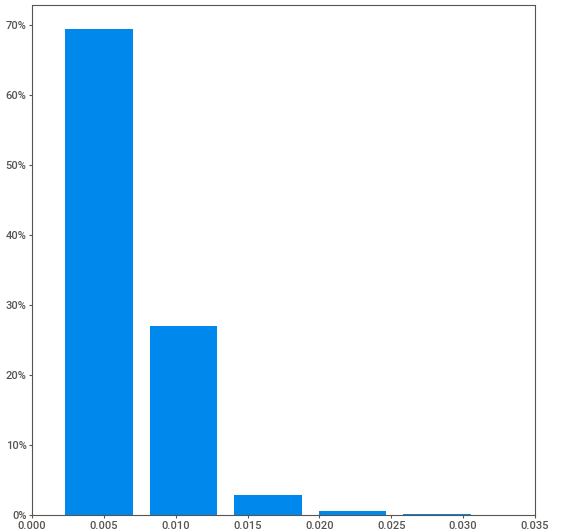
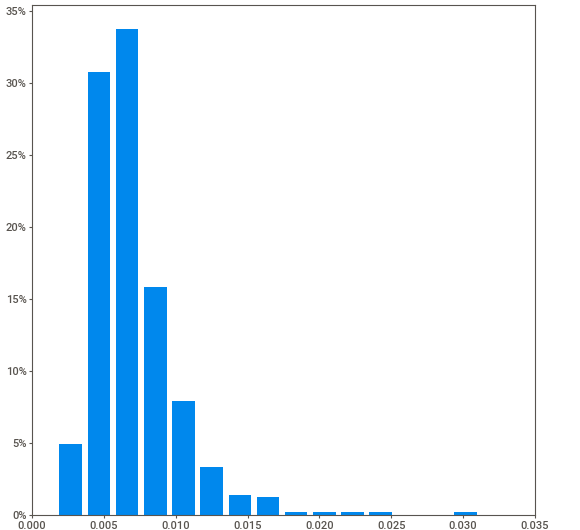
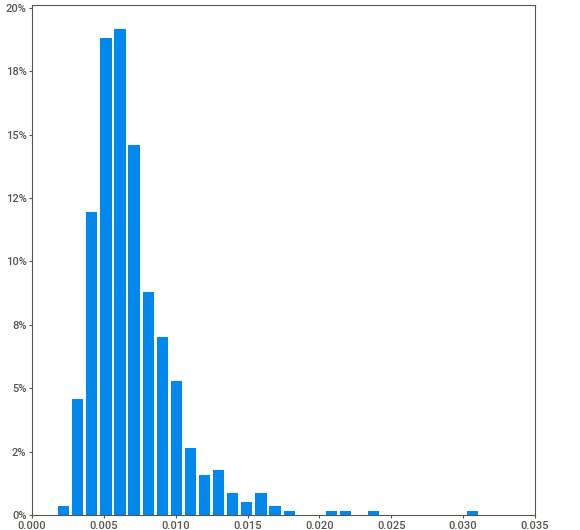
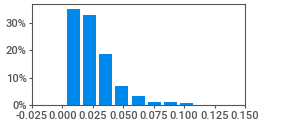
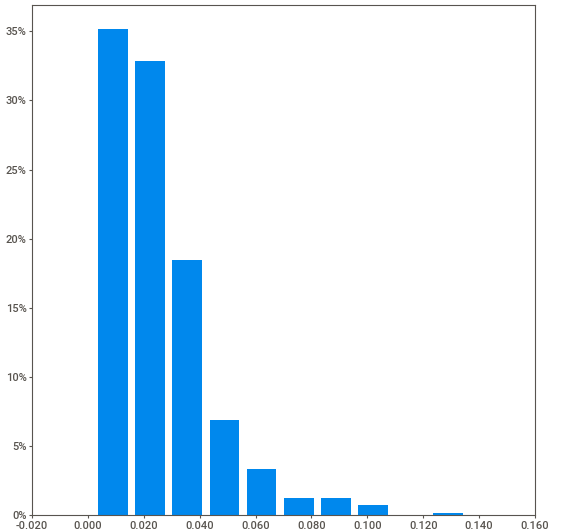
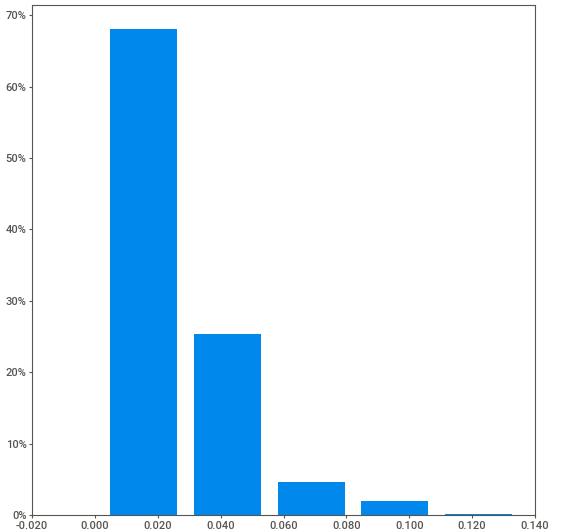
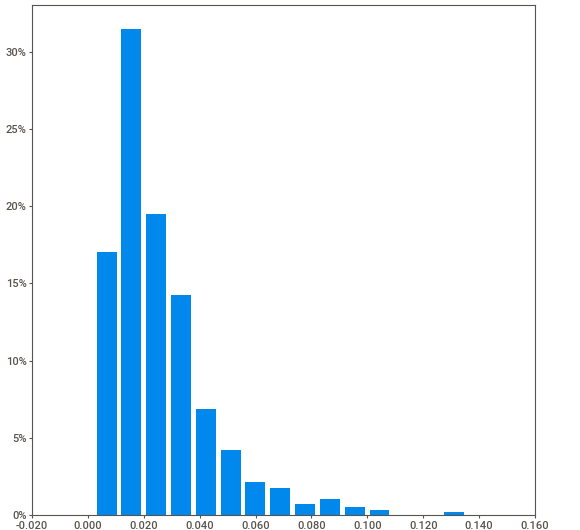
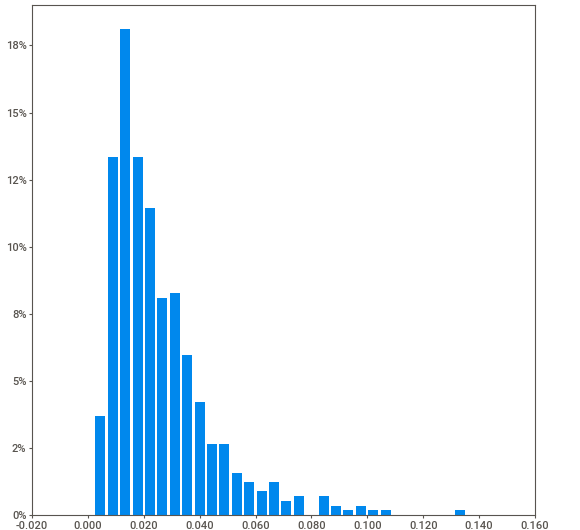
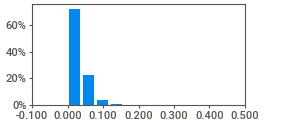
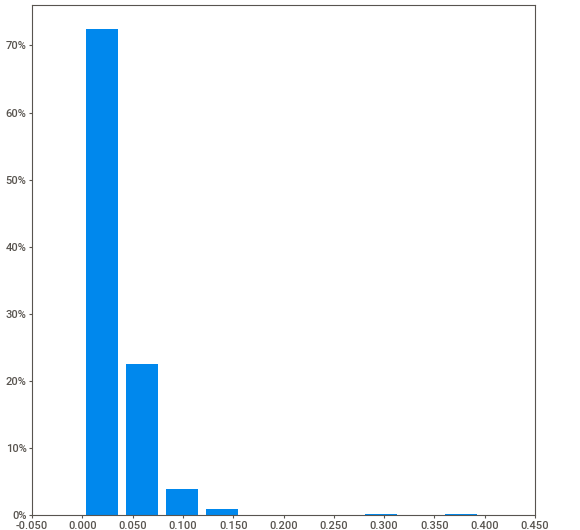
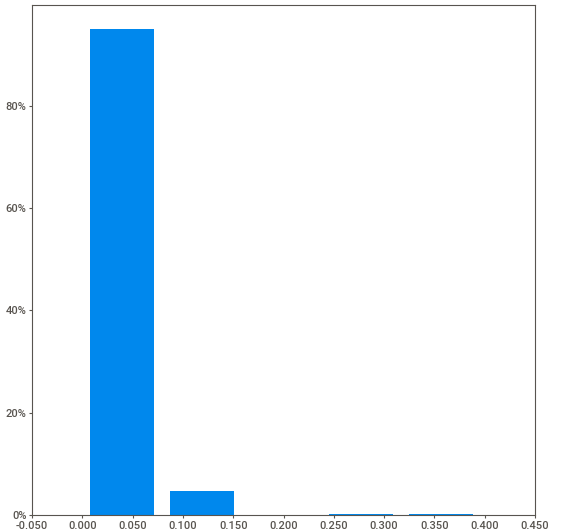
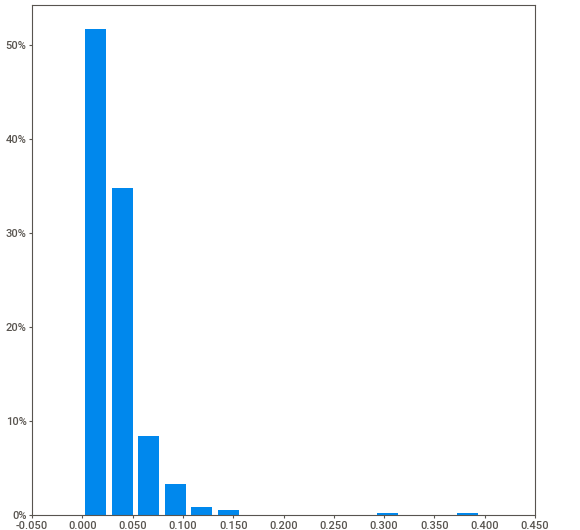
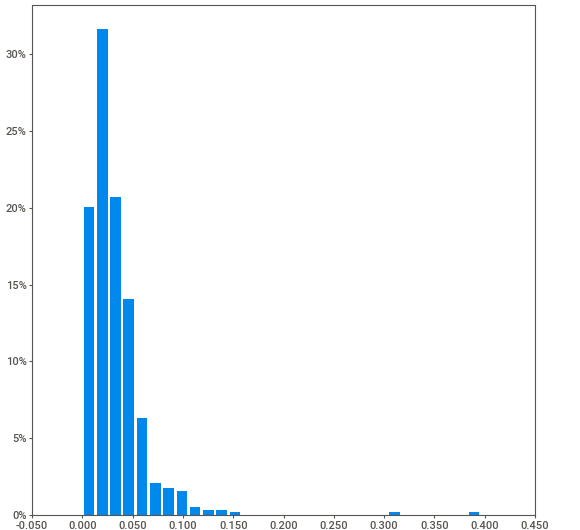
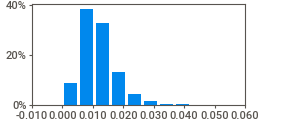
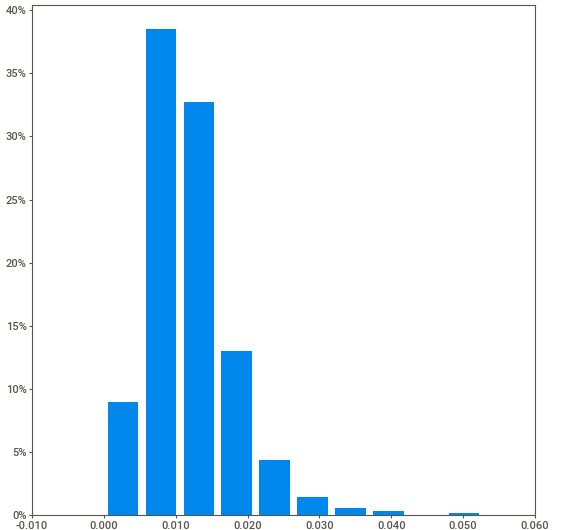
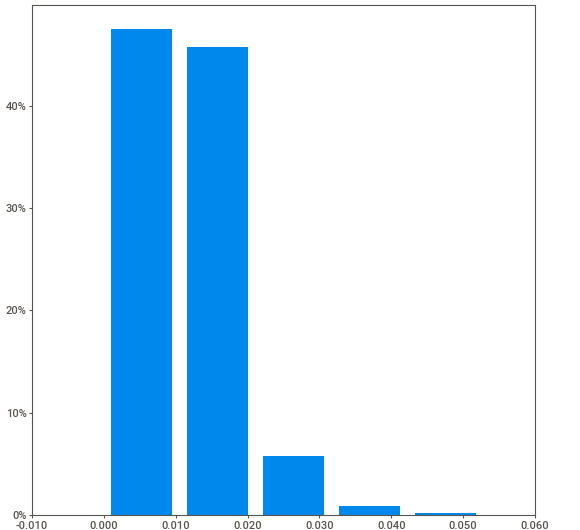
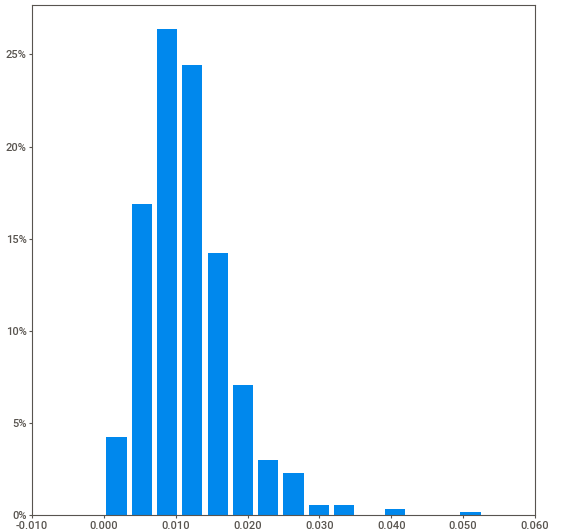
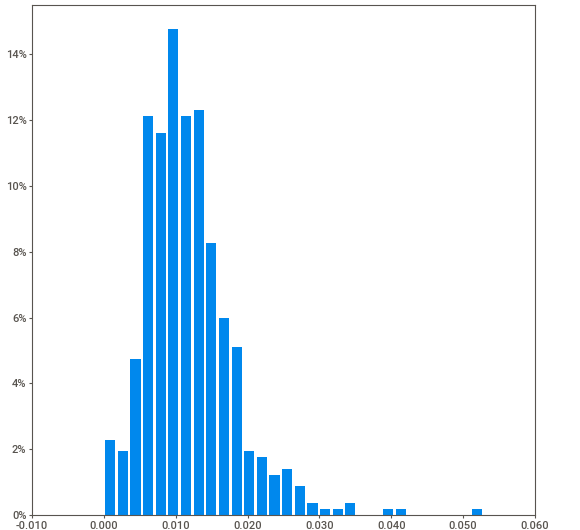
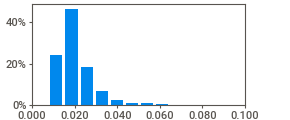
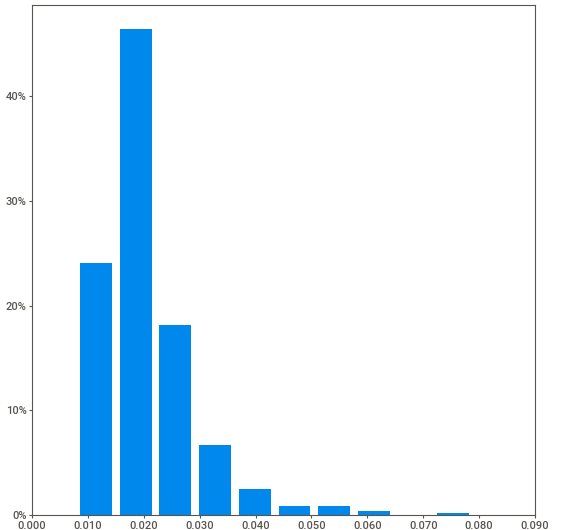
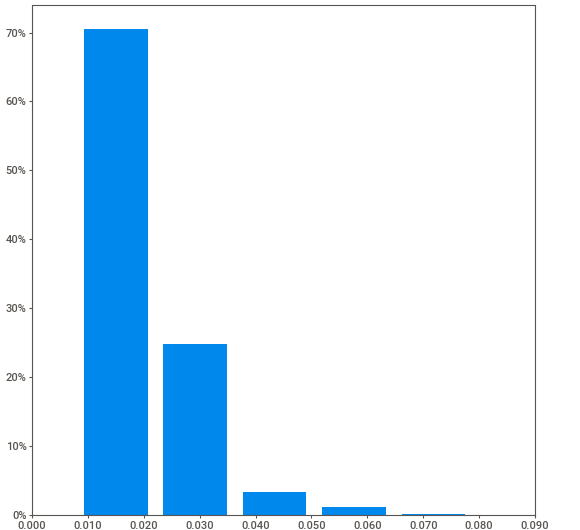
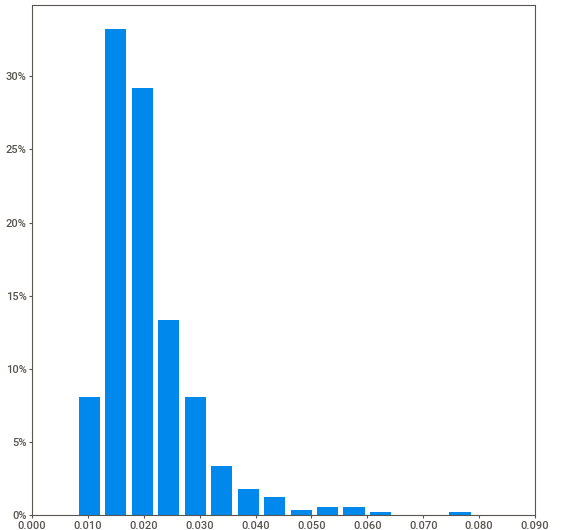
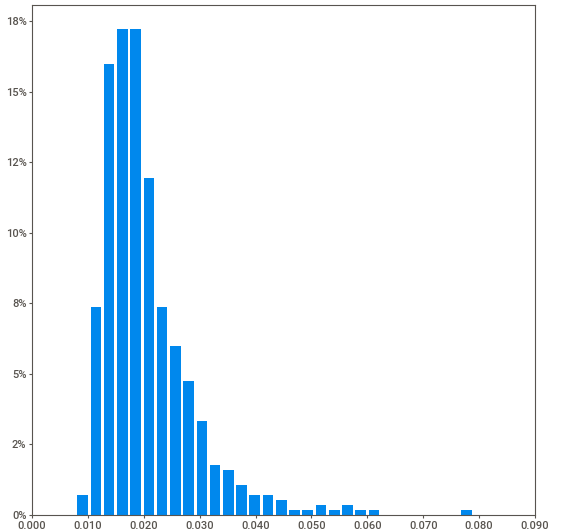
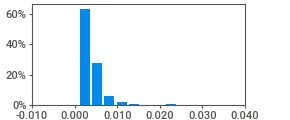
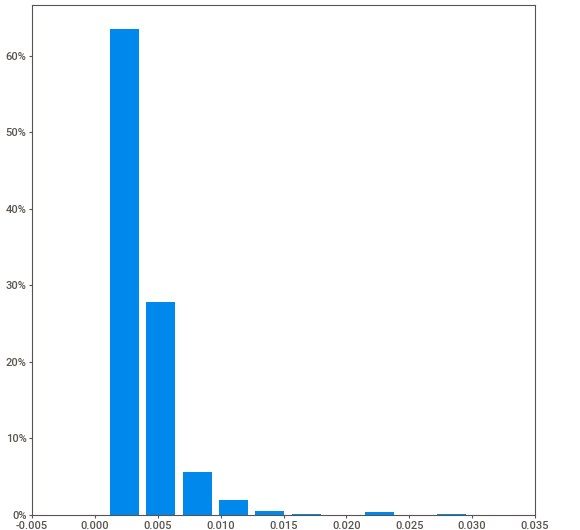
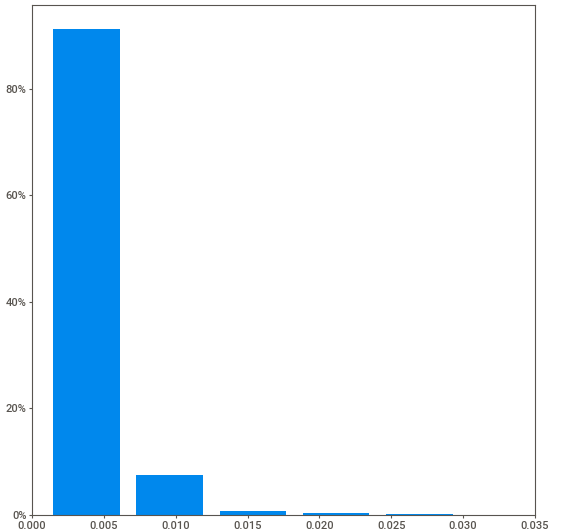
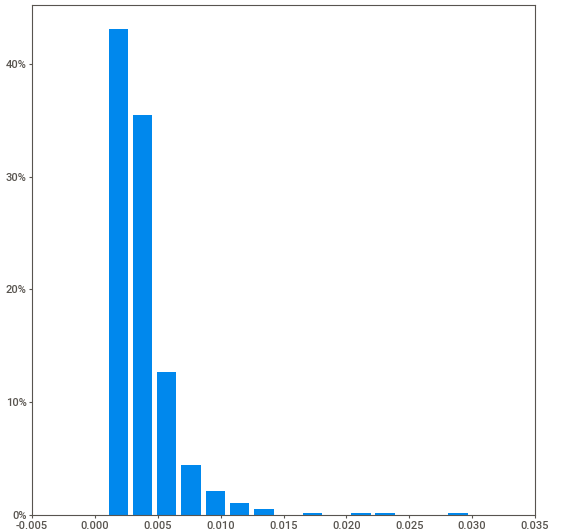
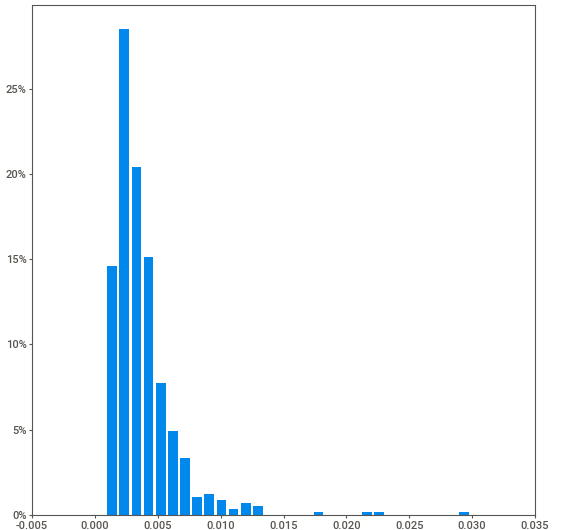
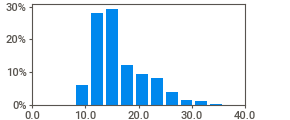
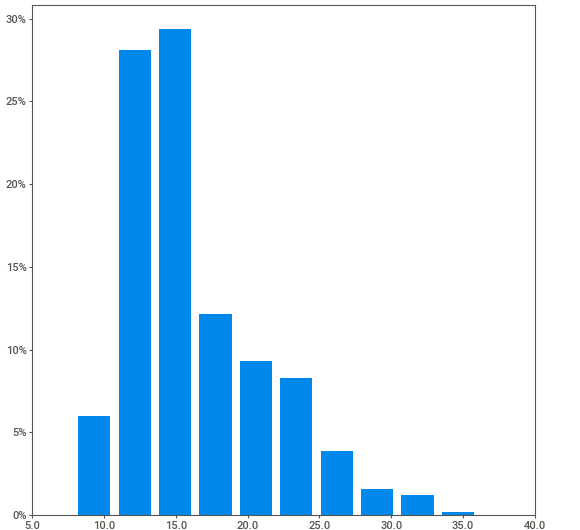
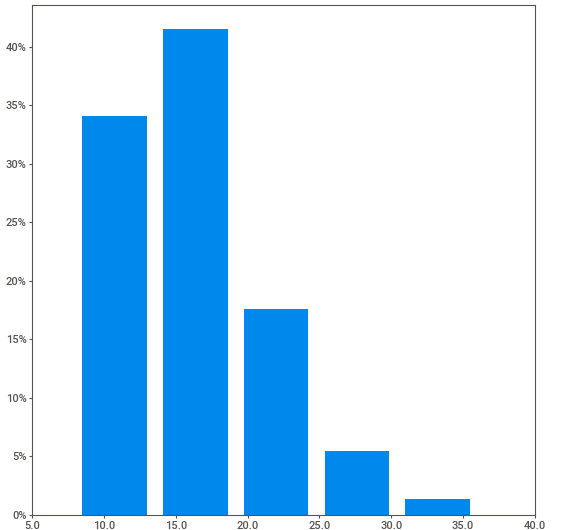
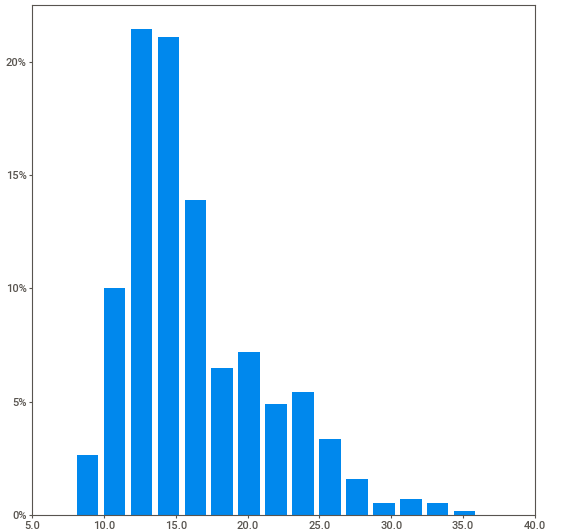
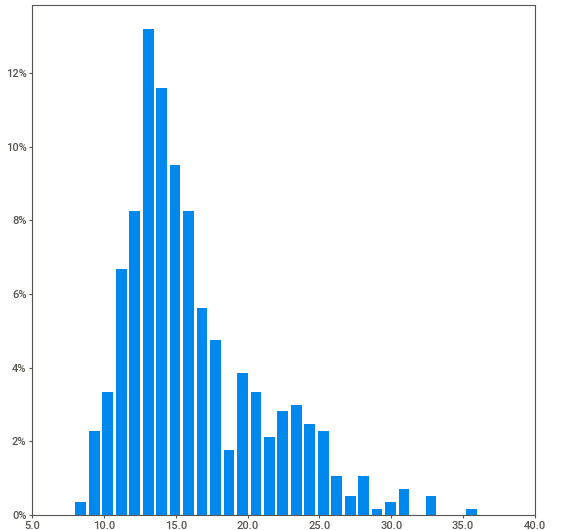
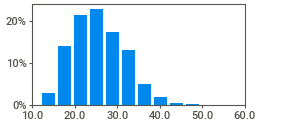
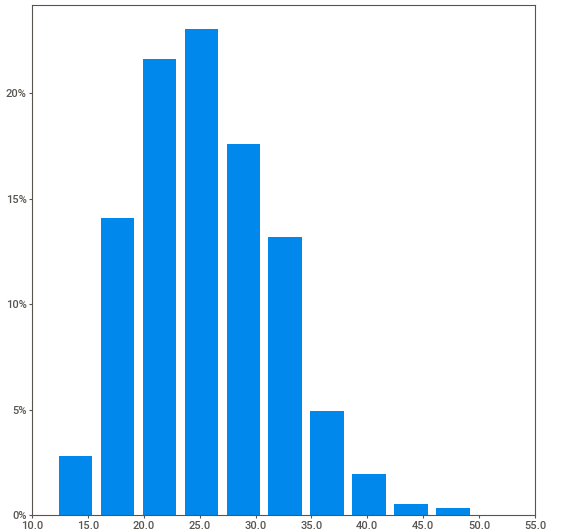
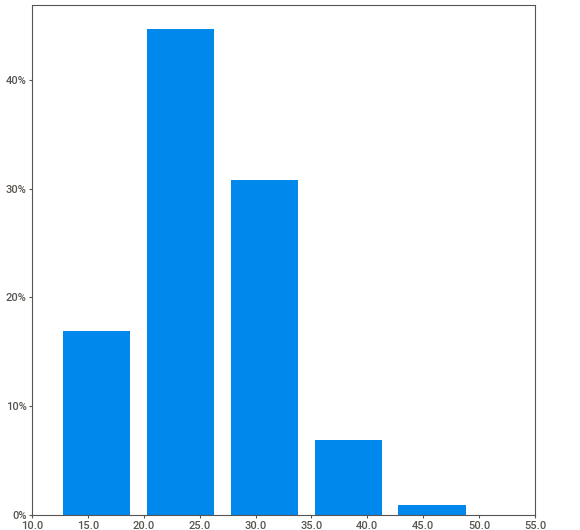
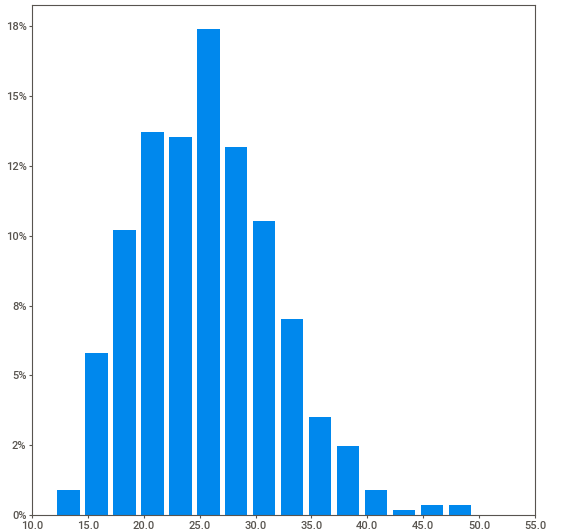
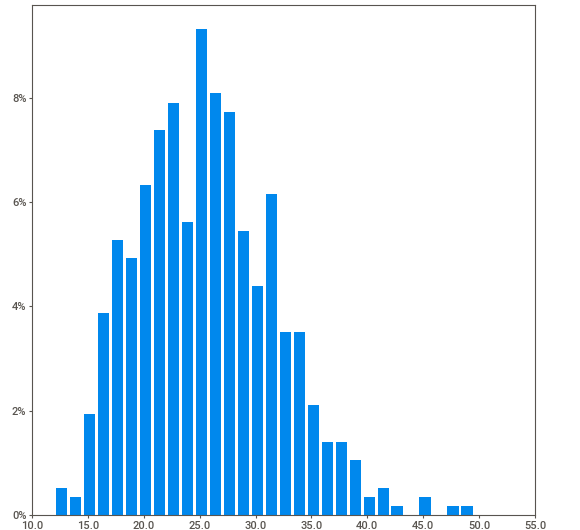
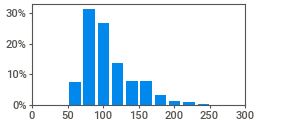
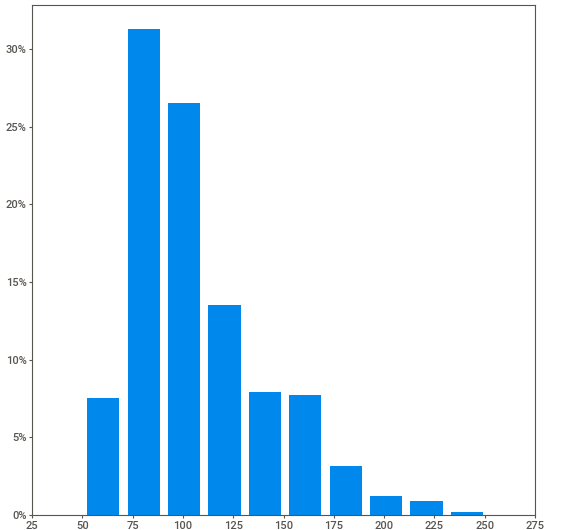
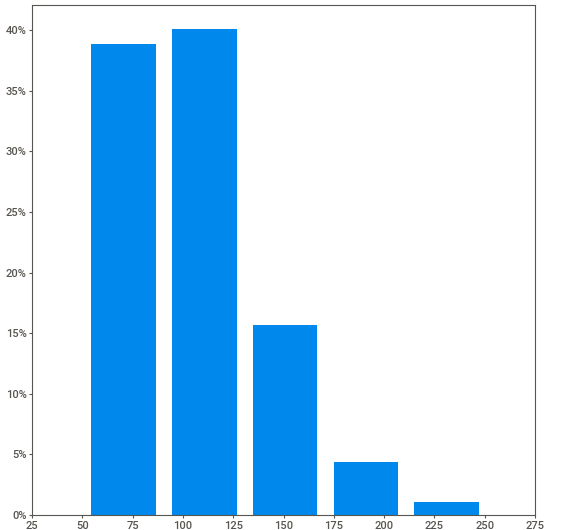
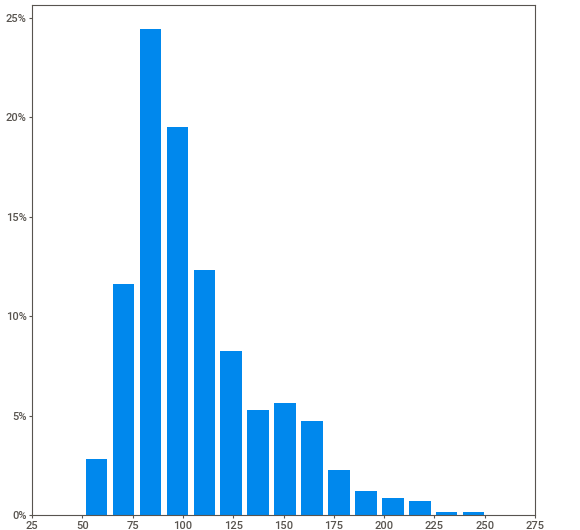
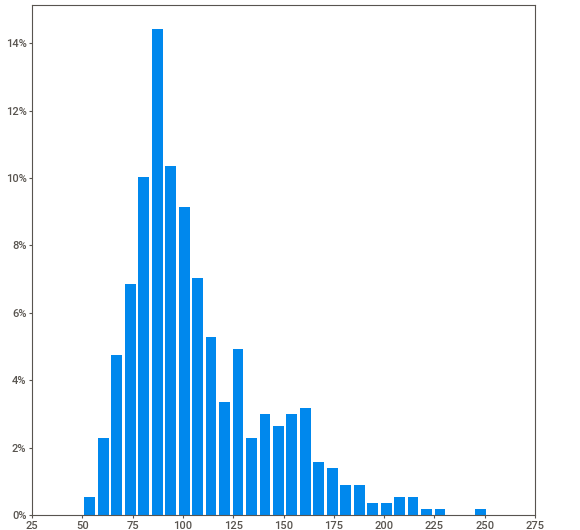
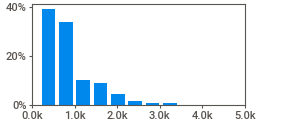
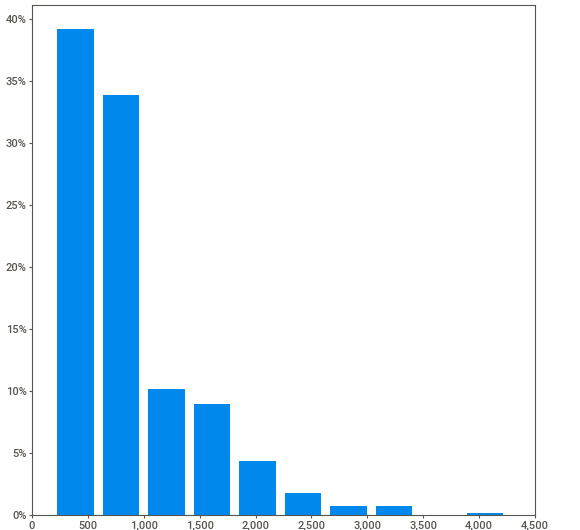
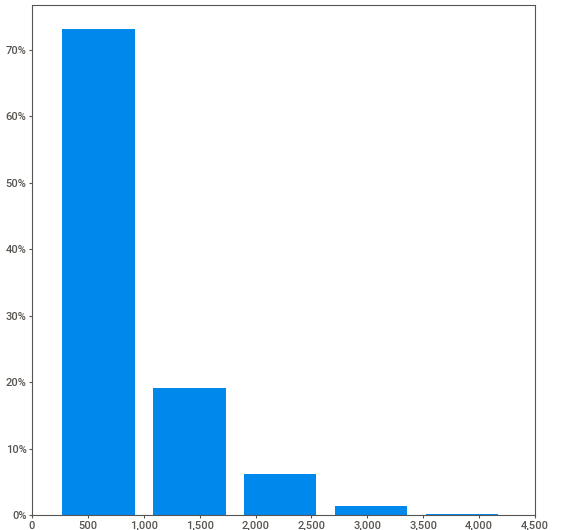
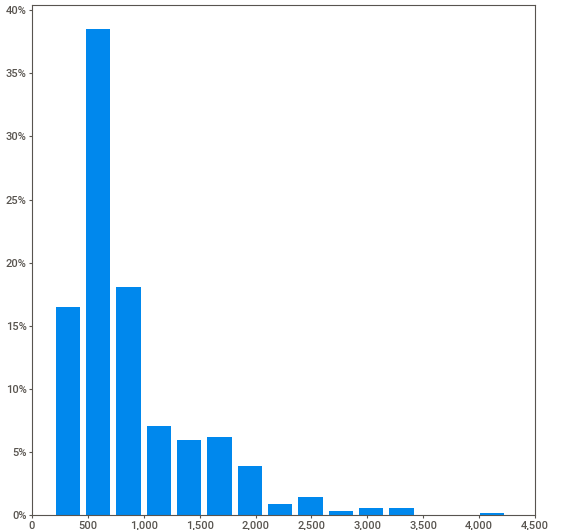
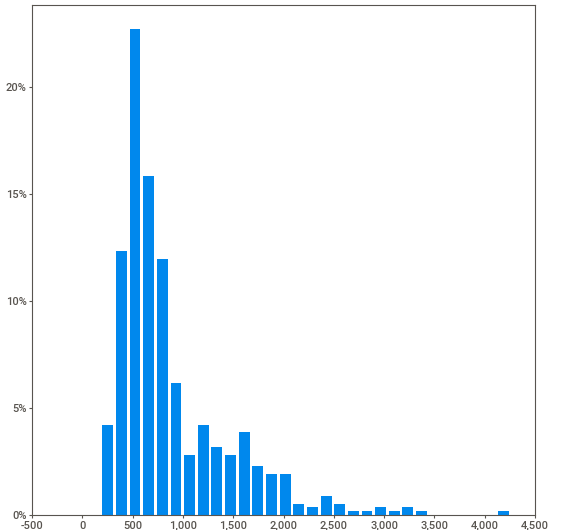
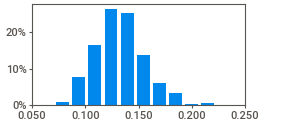
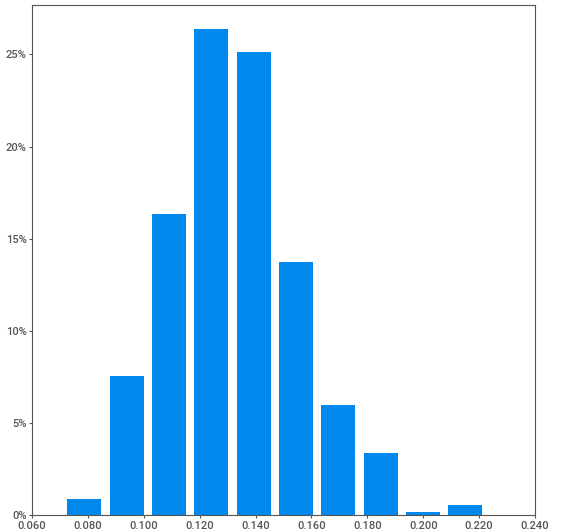
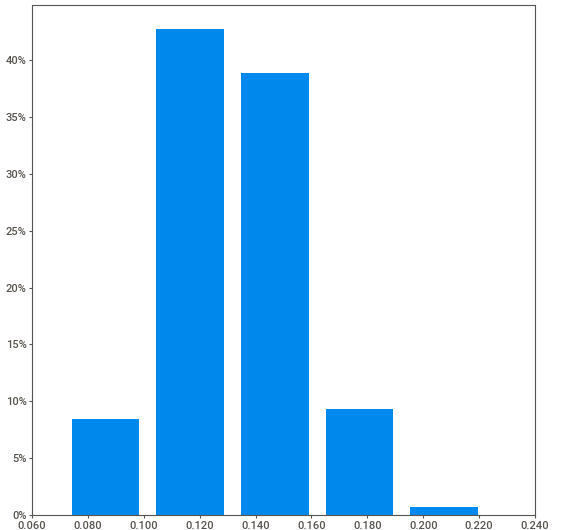
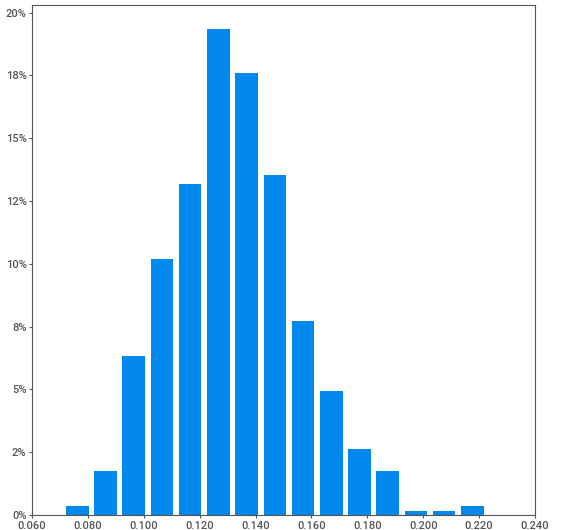
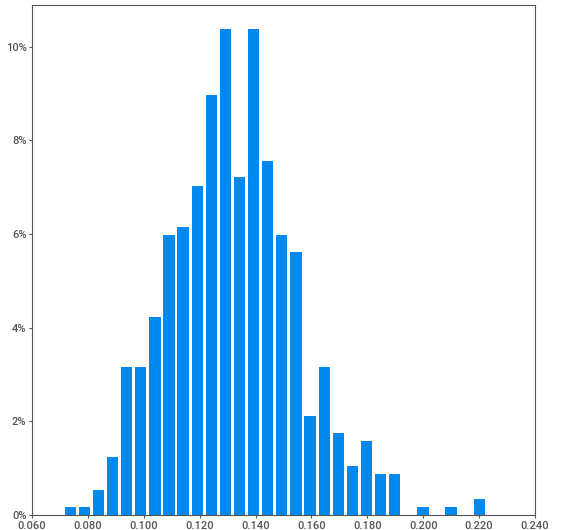
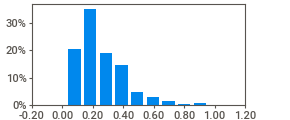
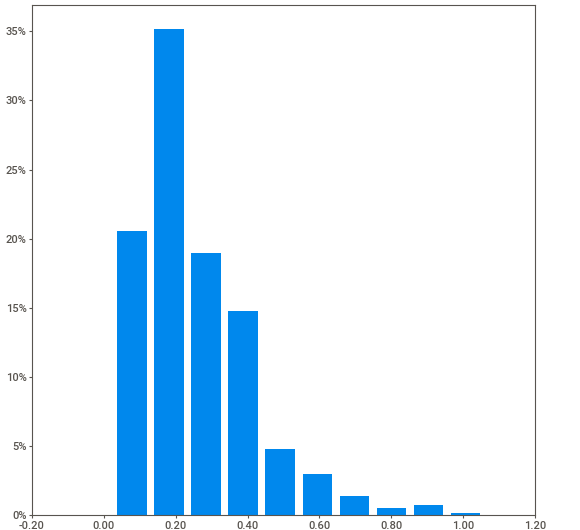
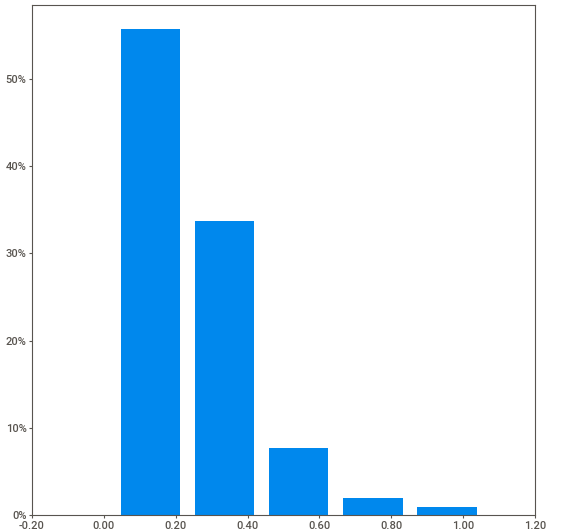
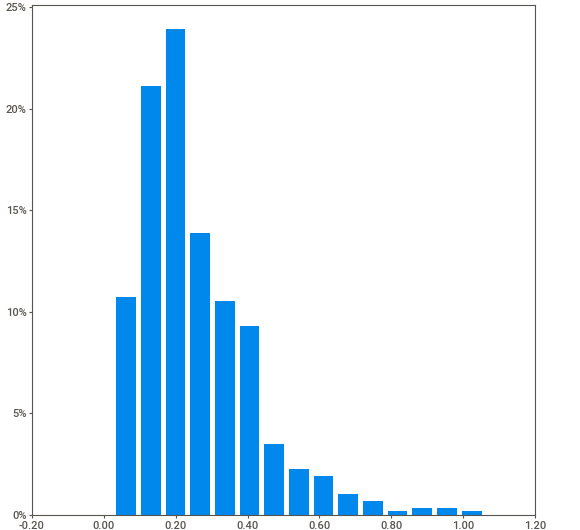
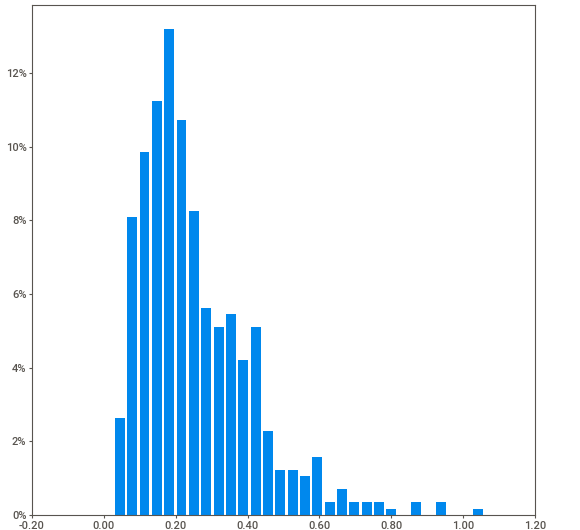
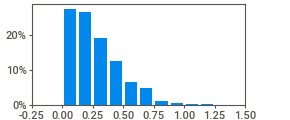
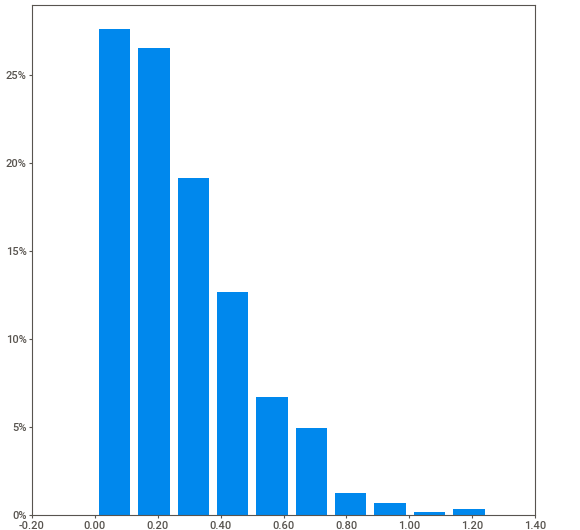
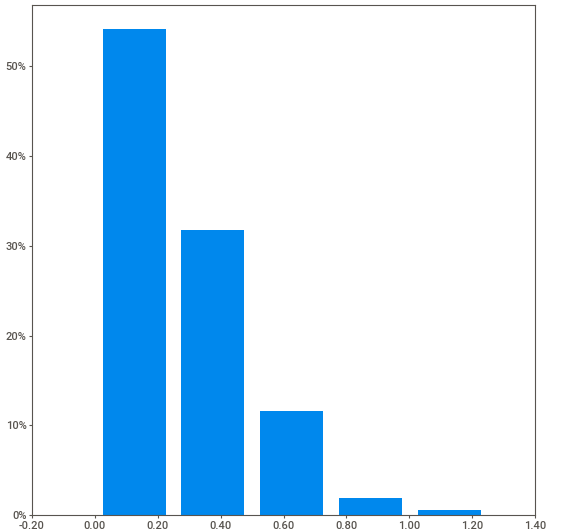
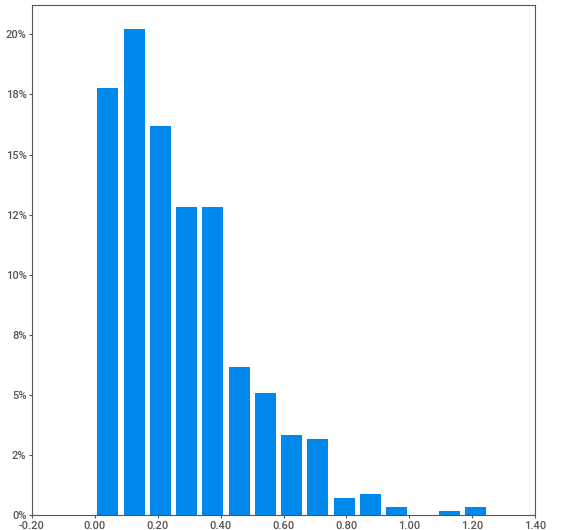
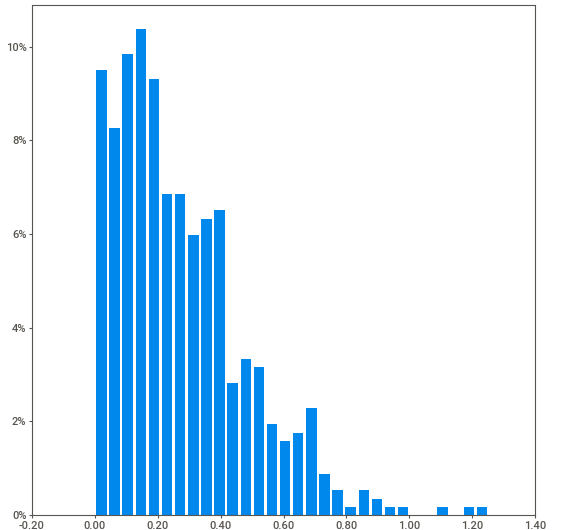
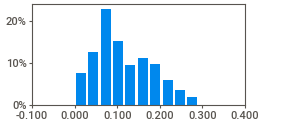
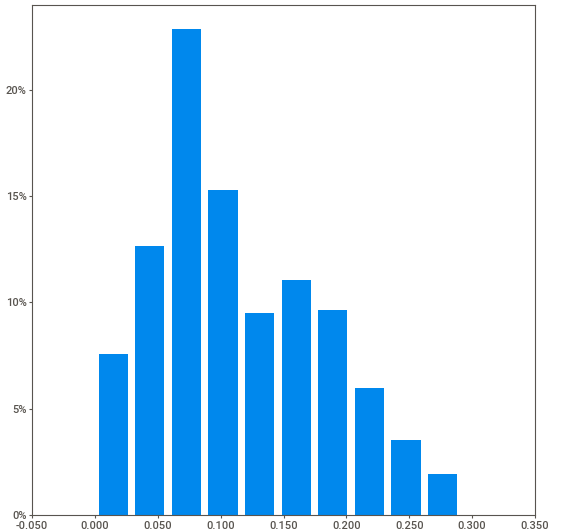
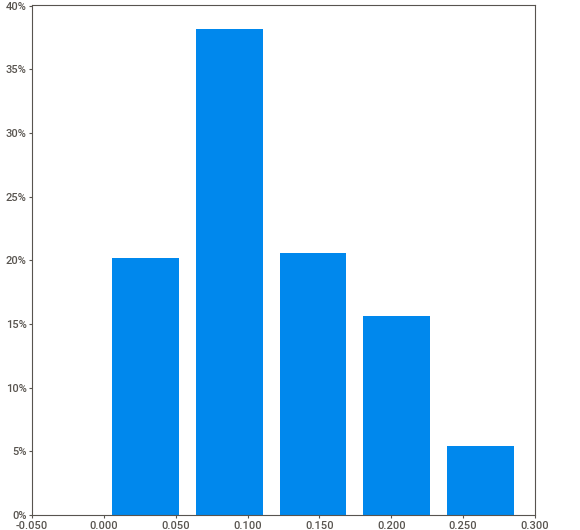
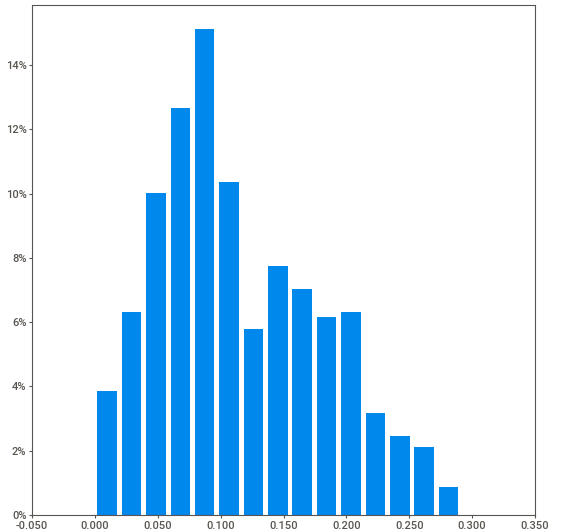
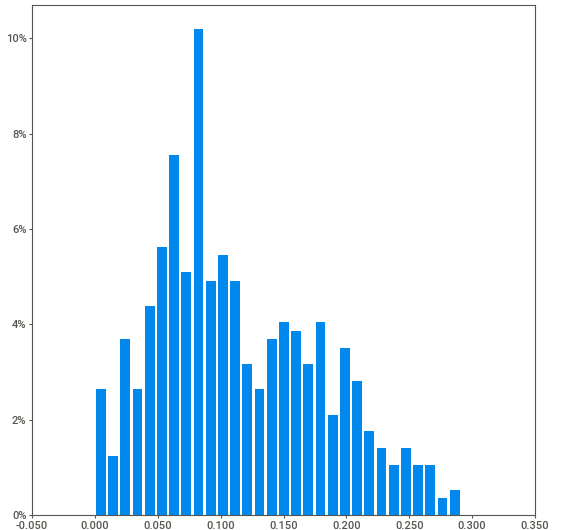
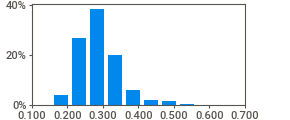
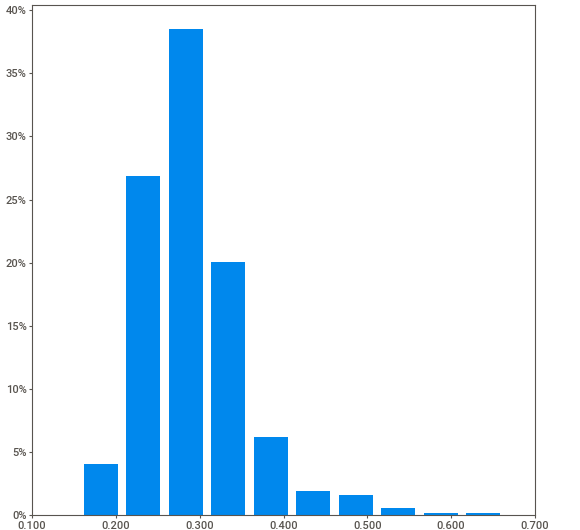
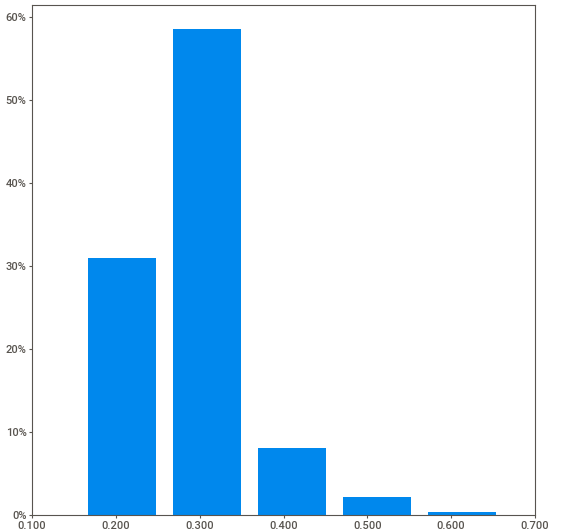
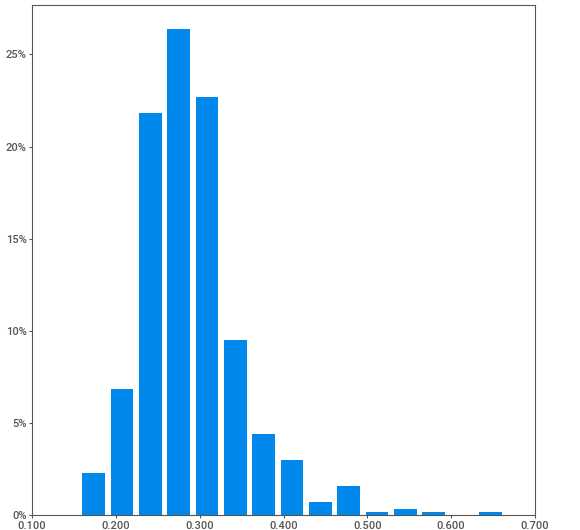
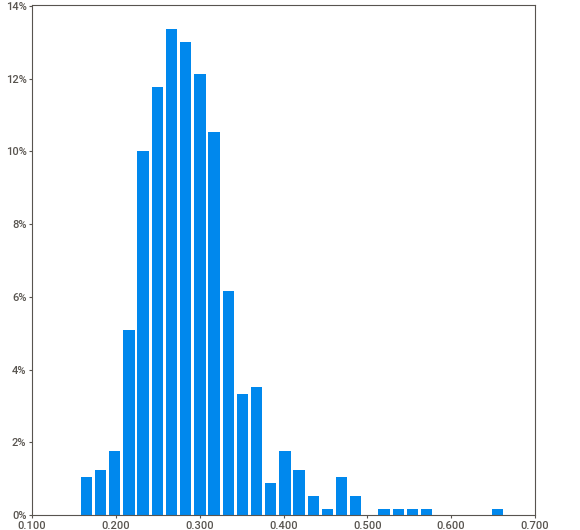
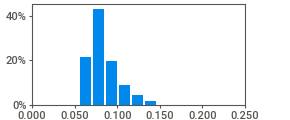
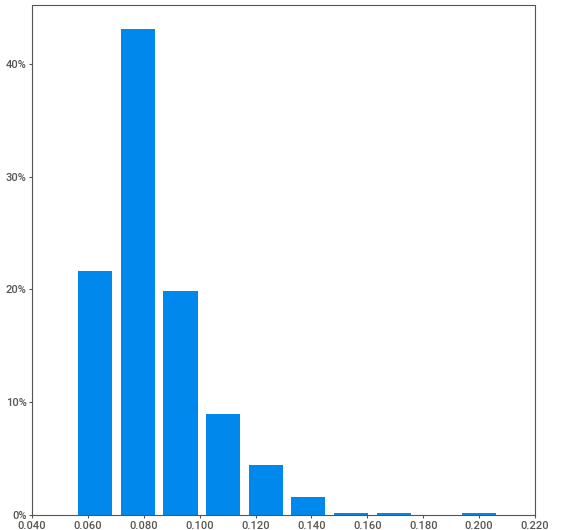
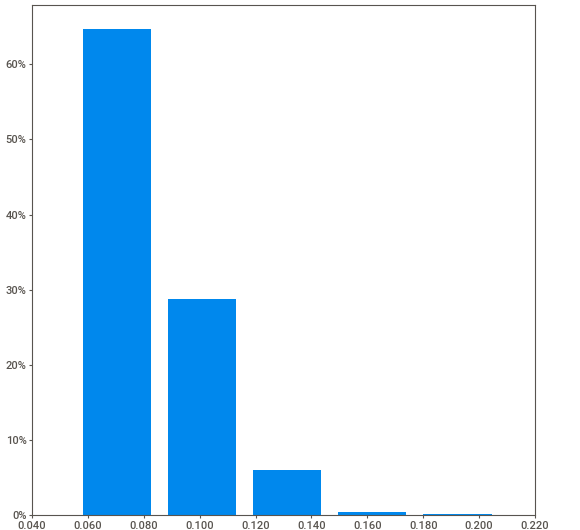
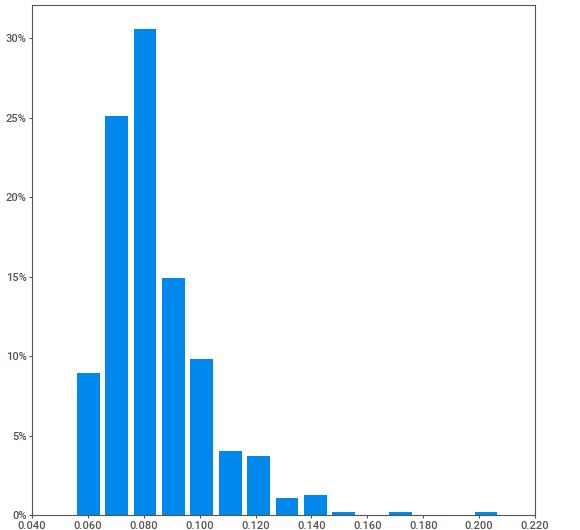
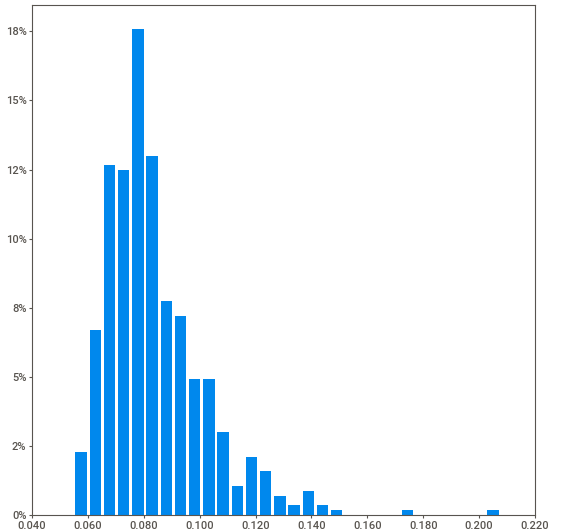
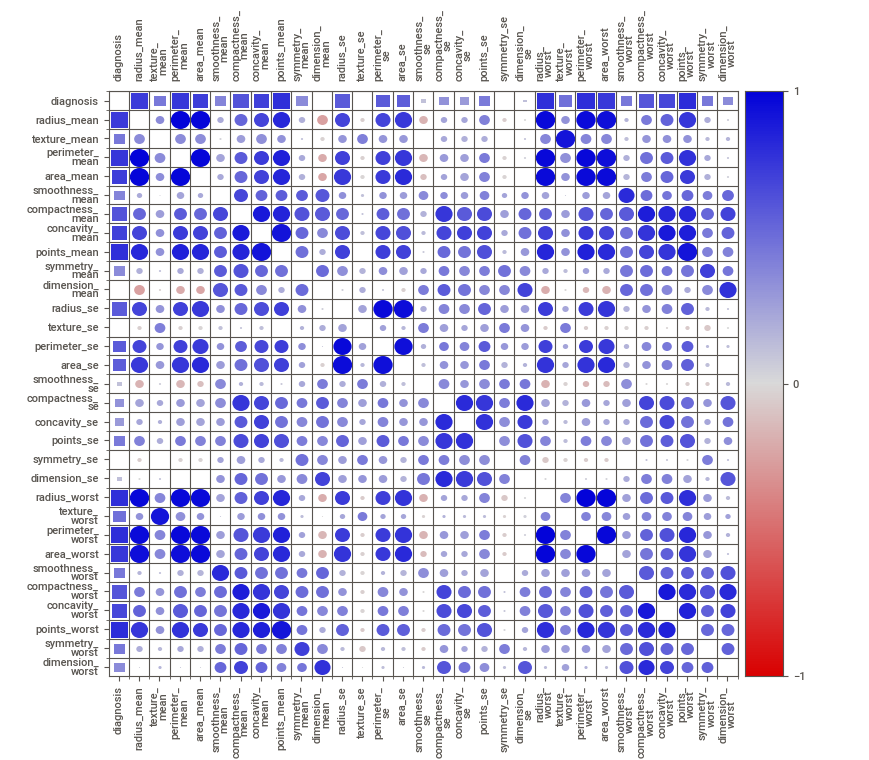
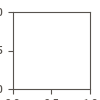

In [9]:
import sweetviz as sv
my_report = sv.analyze(data,pairwise_analysis="on")
my_report.show_notebook()

There are no duplicate values in the dataset

In [10]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\bugra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


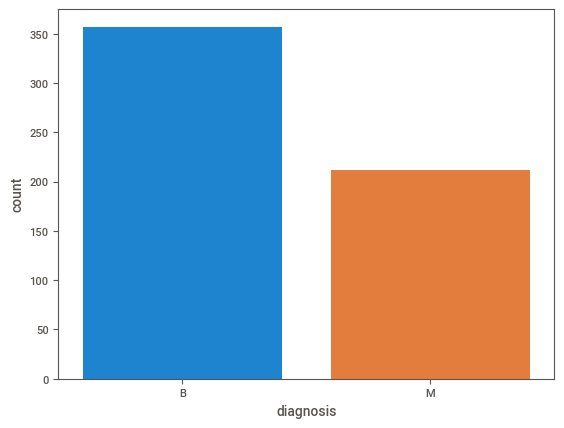

In [11]:

ax = sns.countplot(data.diagnosis,label="Count")


For the upcoming analysis it would be better to change the diagnosis from string to boolean, benign=0 malignant=1

In [12]:
data["diagnosis"] = [1 if i.strip() == "M" else 0 for i in data.diagnosis]

In [13]:
data.describe()

diagnosis          radius_mean         texture_mean  \
count               569.00               569.00               569.00   
mean                  0.37                14.13                19.29   
std                   0.48                 3.52                 4.30   
min                   0.00                 6.98                 9.71   
25%                   0.00                11.70                16.17   
50%                   0.00                13.37                18.84   
75%                   1.00                15.78                21.80   
max                   1.00                28.11                39.28   

            perimeter_mean            area_mean      smoothness_mean  \
count               569.00               569.00               569.00   
mean                 91.97               654.89                 0.10   
std                  24.30               351.91                 0.01   
min                  43.79               143.50                 0.05   
25%                  75.17               420.30                 0.09   
50%                  86.24               551.10                 0.10   
75%                 104.10               782.70                 0.11   
max                 188.50             2,501.00                 0.16   

          compactness_mean       concavity_mean          points_mean  \
count               569.00               569.00               569.00   
mean                  0.10                 0.09                 0.05   
std                   0.05                 0.08                 0.04   
min                   0.02                 0.00                 0.00   
25%                   0.06                 0.03                 0.02   
50%                   0.09                 0.06                 0.03   
75%                   0.13                 0.13                 0.07   
max                   0.35                 0.43                 0.20   

             symmetry_mean  ...         radius_worst        texture_worst  \
count               569.00  ...               569.00               569.00   
mean                  0.18  ...                16.27                25.68   
std                   0.03  ...                 4.83                 6.15   
min                   0.11  ...                 7.93                12.02   
25%                   0.16  ...                13.01                21.08   
50%                   0.18  ...                14.97                25.41   
75%                   0.20  ...                18.79                29.72   
max                   0.30  ...                36.04                49.54   

           perimeter_worst           area_worst     smoothness_worst  \
count               569.00               569.00               569.00   
mean                107.26               880.58                 0.13   
std                  33.60               569.36                 0.02   
min                  50.41               185.20                 0.07   
25%                  84.11               515.30                 0.12   
50%                  97.66               686.50                 0.13   
75%                 125.40             1,084.00                 0.15   
max                 251.20             4,254.00                 0.22   

         compactness_worst      concavity_worst         points_worst  \
count               569.00               569.00               569.00   
mean                  0.25                 0.27                 0.11   
std                   0.16                 0.21                 0.07   
min                   0.03                 0.00                 0.00   
25%                   0.15                 0.11                 0.06   
50%                   0.21                 0.23                 0.10   
75%                   0.34                 0.38                 0.16   
max                   1.06                 1.25                 0.29   

            symmetry_worst      dimension_worst  
count               569.00  

Time to find out the correaltions within tha data

In [14]:
data.corr()

diagnosis          radius_mean  \
diagnosis                         1.00                 0.73   
radius_mean                       0.73                 1.00   
texture_mean                      0.42                 0.32   
perimeter_mean                    0.74                 1.00   
area_mean                         0.71                 0.99   
smoothness_mean                   0.36                 0.17   
compactness_mean                  0.60                 0.51   
concavity_mean                    0.70                 0.68   
points_mean                       0.78                 0.82   
symmetry_mean                     0.33                 0.15   
dimension_mean                   -0.01                -0.31   
radius_se                         0.57                 0.68   
texture_se                       -0.01                -0.10   
perimeter_se                      0.56                 0.67   
area_se                           0.55                 0.74   
smoothness_se                    -0.07                -0.22   
compactness_se                    0.29                 0.21   
concavity_se                      0.25                 0.19   
points_se                         0.41                 0.38   
symmetry_se                      -0.01                -0.10   
dimension_se                      0.08                -0.04   
radius_worst                      0.78                 0.97   
texture_worst                     0.46                 0.30   
perimeter_worst                   0.78                 0.97   
area_worst                        0.73                 0.94   
smoothness_worst                  0.42                 0.12   
compactness_worst                 0.59                 0.41   
concavity_worst                   0.66                 0.53   
points_worst                      0.79                 0.74   
symmetry_worst                    0.42                 0.16   
dimension_worst                   0.32                 0.01   

                          texture_mean       perimeter_mean  \
diagnosis                         0.42                 0.74   
radius_mean                       0.32                 1.00   
texture_mean                      1.00                 0.33   
perimeter_mean                    0.33                 1.00   
area_mean                         0.32                 0.99   
smoothness_mean                  -0.02                 0.21   
compactness_mean                  0.24                 0.56   
concavity_mean                    0.30                 0.72   
points_mean                       0.29                 0.85   
symmetry_mean                     0.07                 0.18   
dimension_mean                   -0.08                -0.26   
radius_se                         0.28                 0.69   
texture_se                        0.39                -0.09   
perimeter_se                      0.28                 0.69   
area_se                           0.26                 0.74   
smoothness_se                     0.01                -0.20   
compactness_se                    0.19                 0.25   
concavity_se                      0.14                 0.23   
points_se                         0.16                 0.41   
symmetry_se                       0.01                -0.08   
dimension_se                      0.05                -0.01   
radius_worst                      0.35                 0.97   
texture_worst                     0.91                 0.30   
perimeter_worst                   0.36                 0.97   
area_worst                        0.34                 0.94   
smoothness_worst                  0.08                 0.15   
compactness_worst                 0.28                 0.46   
concavity_worst                   0.30                 0.56   
points_worst                      0.30                 0.77   
symmetry_worst                    0.11                 0.19   
dimension_worst                   0.12                 0.05

and to visualize it

<AxesSubplot:>

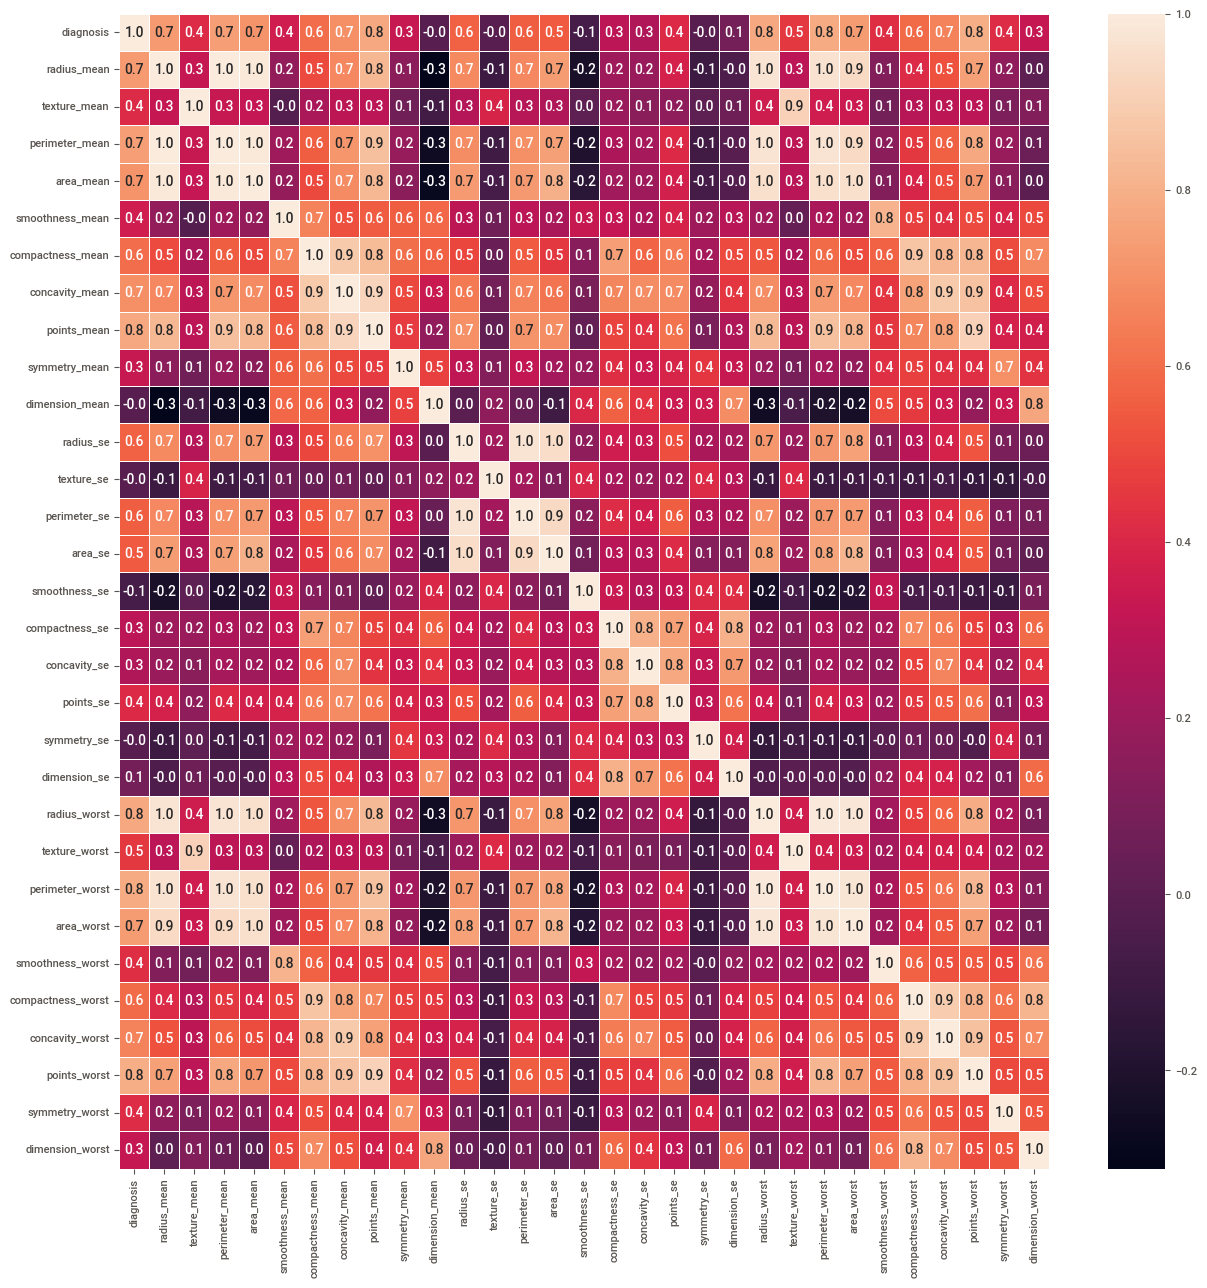

In [15]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True,linewidths=.5, fmt= '.1f',ax=ax)

There are certain correlations in the data, in order to see it clearly, I need to find the most correlated ones, greater than 0.75

Text(0.5, 1.0, 'Correlation Between Features with Threshold is greater than 0.75')

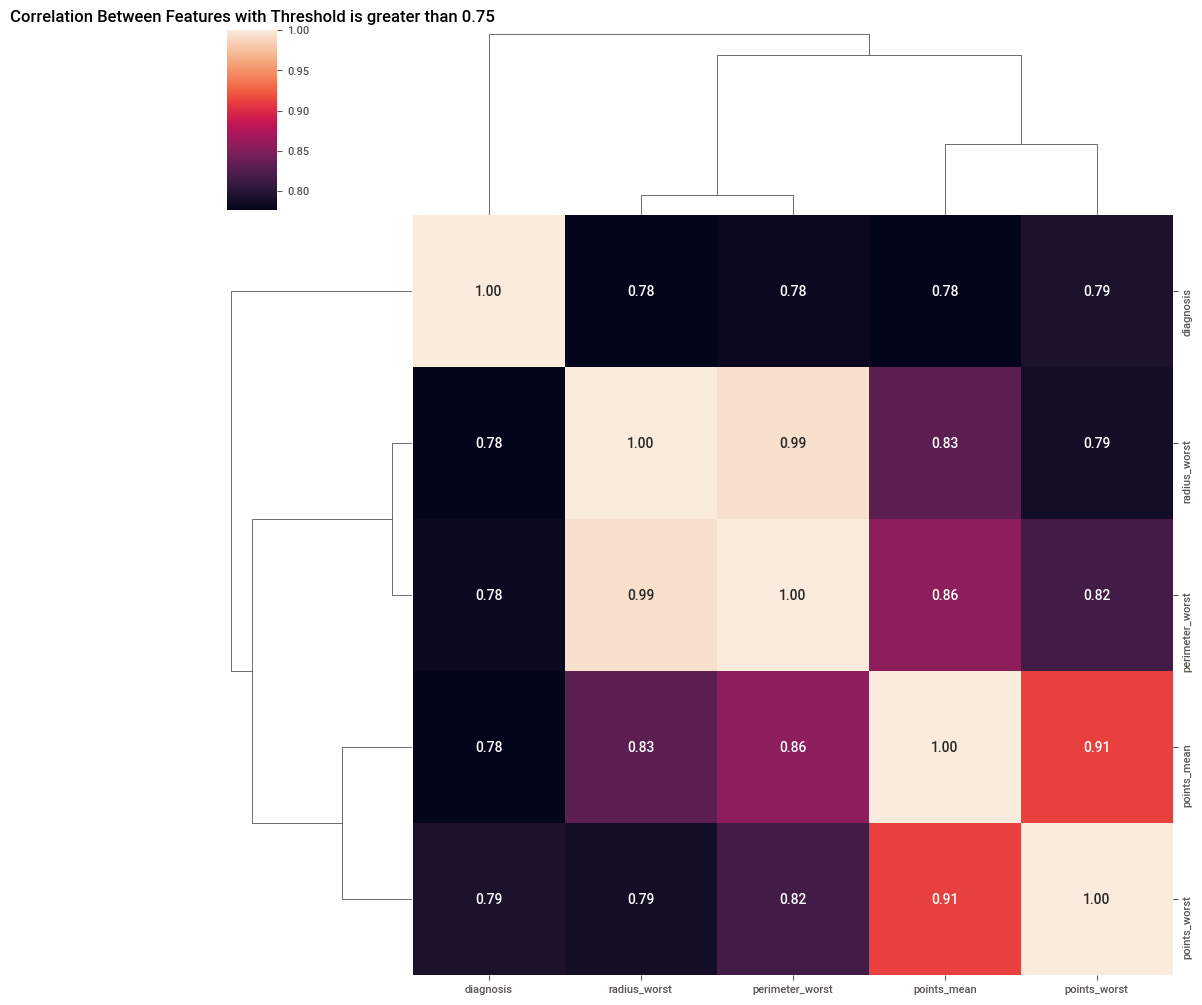

In [16]:
correlated_data = data.corr()
threshold = np.abs(correlated_data["diagnosis"] > 0.75)
importants = correlated_data.columns[threshold].tolist()
sns.clustermap(data[importants].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features with Threshold is greater than 0.75")

Here I can see that diagnosis result is highly correlated to radius_worst, perimeter_worst, points_mean and points_worst values.

Take a look into radious_worst vs diagnosis outcome

In [17]:
fig = px.box(data,x='diagnosis',y='radius_worst', title='Malignant vs Benign radious_worst',color='diagnosis',points='all')
fig.show()

I can clearly see that worst radious value is related to diagnosis outcome. Larger cell radious leads to positive diagnosis.

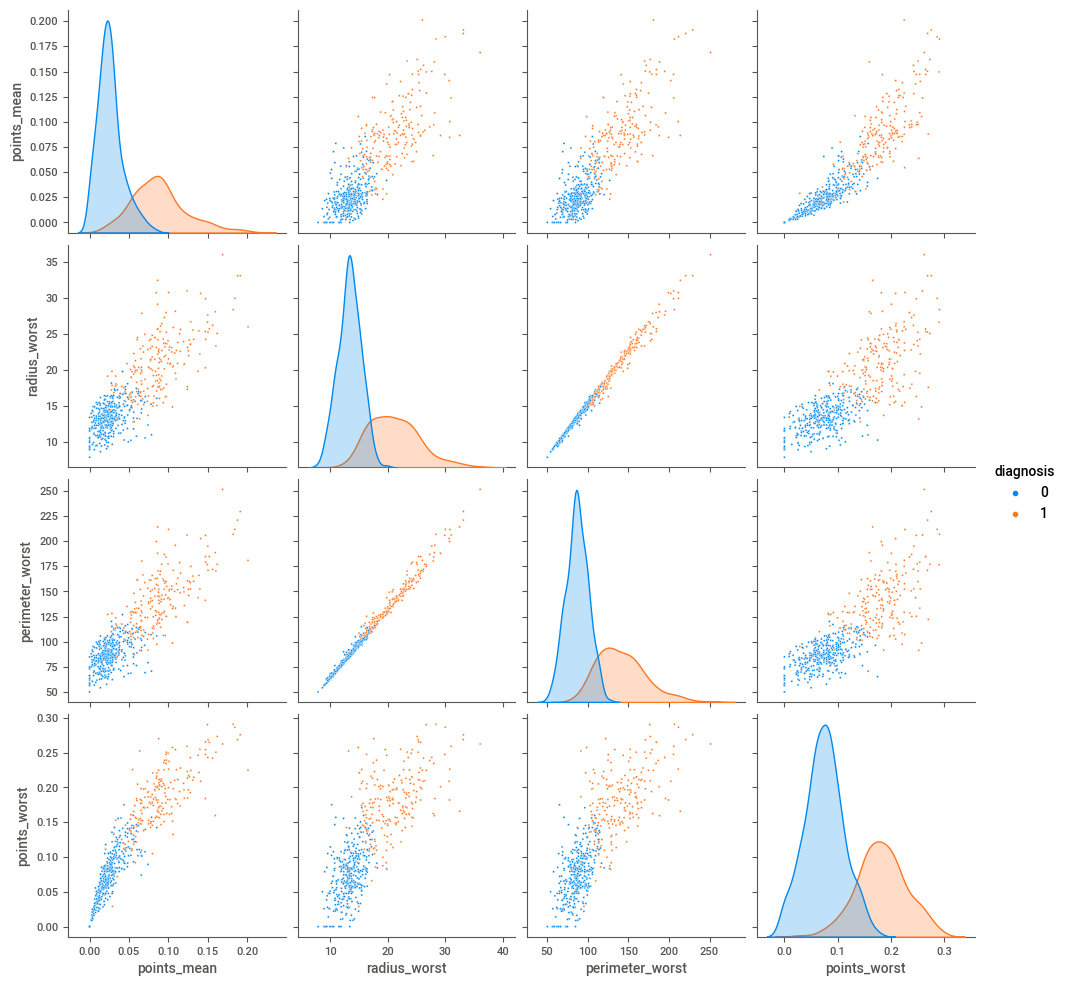

In [18]:
sns.pairplot(data[importants], diag_kind = "kde", markers = ".", hue = "diagnosis")
plt.show()

Looking at these charts, I can clearly see that the parameters are good for deciding the diagnosis outcome.

### Outliers Analysis

In [19]:
x = data.drop(["diagnosis"], axis = 1)
y = data.diagnosis
columns = x.columns.tolist()

In [20]:
lof = LocalOutlierFactor()
y_outliers = lof.fit_predict(x)

In [21]:
y_outliers

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

This function gives output of outliers. "1" is non-outlier while "-1" is a possible outlier

In [22]:
X_score = lof.negative_outlier_factor_

In [23]:
X_score

array([-0.97288508, -1.06859753, -1.02405645, -1.05016057, -1.08019159,
       -0.98535812, -0.98606513, -1.52185143, -1.00979856, -1.02419529,
       -1.00540365, -0.98595786, -1.04856941, -0.99159205, -1.12905639,
       -1.110468  , -1.0377723 , -1.01405949, -0.9934301 , -0.96000034,
       -0.97757117, -0.97958627, -1.06866756, -1.05606033, -1.00280459,
       -1.1311187 , -0.97403485, -1.1171278 , -0.9989313 , -1.02528095,
       -1.11517805, -1.07010806, -1.0323307 , -1.12620585, -1.06050667,
       -1.07792158, -1.09992001, -0.98073925, -0.97913574, -1.04742045,
       -1.00985919, -1.25009966, -1.59693295, -0.99864842, -1.0203948 ,
       -1.01531891, -1.06233991, -1.83284669, -1.00751196, -0.98844751,
       -1.06845366, -0.96497132, -1.06323429, -1.06067084, -1.72262604,
       -0.95437931, -1.08957483, -1.22919284, -1.86511597, -0.96448423,
       -0.98035055, -1.10530418, -1.36508037, -1.14776543, -1.00120872,
       -0.98301629, -1.01881125, -0.99084022, -1.03475003, -1.04

I'll move outlier score to a dataframe so I can visualize it

In [24]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

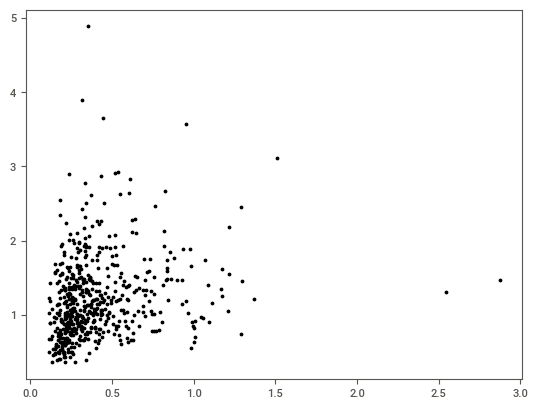

In [25]:
plt.figure()
plt.scatter(x.iloc[:,10], x.iloc[:,11], color = "k", s = 3, label = "Data Point")

This graph is radius_worst vs.texture_worst scatter plot just to visualize the valid datapoints

In [26]:
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius
outlier_score

score               radius
0                  -0.97                 0.01
1                  -1.07                 0.06
2                  -1.02                 0.04
3                  -1.05                 0.05
4                  -1.08                 0.06
..                   ...                  ...
564                -1.03                 0.04
565                -0.97                 0.01
566                -0.99                 0.02
567                -1.05                 0.05
568                -1.38                 0.20

[569 rows x 2 columns]

In [27]:
outlier_score.describe()

score               radius
count               569.00               569.00
mean                 -1.09                 0.07
std                   0.21                 0.10
min                  -3.13                 0.00
25%                  -1.09                 0.02
50%                  -1.03                 0.04
75%                  -0.99                 0.07
max                  -0.95                 1.00

Outlier score tells me that mean score is the same as 25% value (-1.09) while the minimum value is -3.13. Therefore values below -2 can be considered as outliers.

In [28]:
threshold_outlier = -2
filtre = outlier_score["score"] < threshold_outlier
outlier_index = outlier_score[filtre].index.tolist()

It's always a good idea to visualize the results.

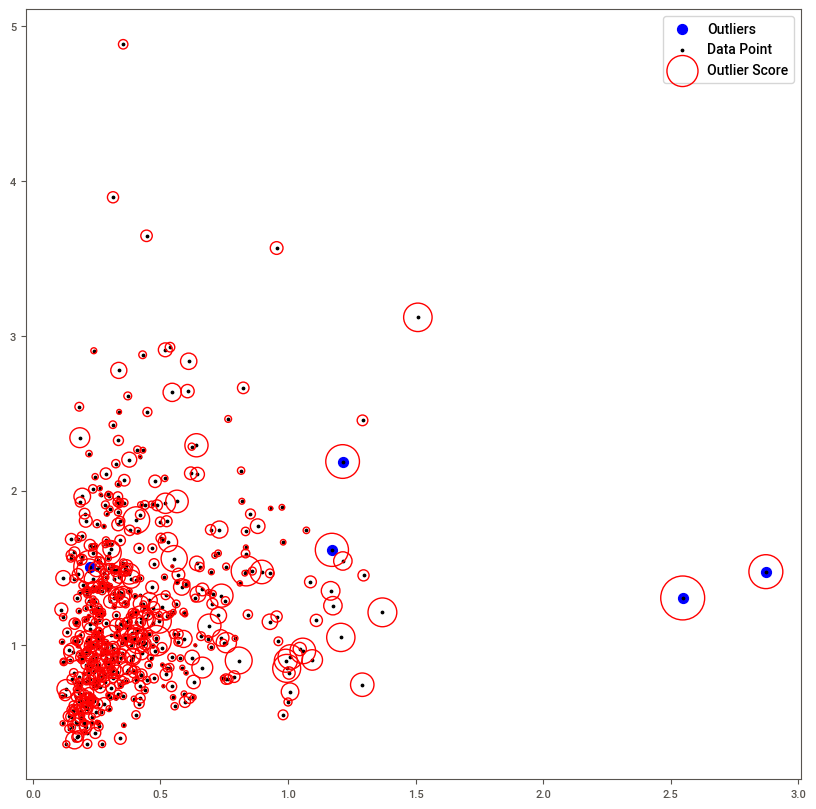

In [29]:
plt.figure(figsize = (10,10))
plt.scatter(x.iloc[outlier_index,10], x.iloc[outlier_index,11], color = "blue", s = 50, label = "Outliers")
plt.scatter(x.iloc[:,10], x.iloc[:,11], color = "k", s = 3, label = "Data Point")
plt.scatter(x.iloc[:,10], x.iloc[:,11], s = 1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Score")
plt.legend()

The red circles are drawn according to the calculated outlier scores.

The blue dots are the data points where outlier score is lower than -2

Drop outliers from dataframe and define the x and y for ML

In [30]:
x

radius_mean         texture_mean       perimeter_mean  \
0                  12.32                12.39                78.85   
1                  10.60                18.95                69.28   
2                  11.04                16.83                70.92   
3                  11.28                13.39                73.00   
4                  15.19                13.21                97.65   
..                   ...                  ...                  ...   
564                13.17                18.22                84.28   
565                10.26                14.71                66.20   
566                15.28                22.41                98.92   
567                14.53                13.98                93.86   
568                21.37                15.10               141.30   

               area_mean      smoothness_mean     compactness_mean  \
0                 464.10                 0.10                 0.07   
1                 346.40                 0.10                 0.11   
2                 373.20                 0.11                 0.08   
3                 384.80                 0.12                 0.11   
4                 711.80                 0.08                 0.07   
..                   ...                  ...                  ...   
564               537.30                 0.07                 0.06   
565               321.60                 0.10                 0.09   
566               710.60                 0.09                 0.11   
567               644.20                 0.11                 0.09   
568             1,386.00                 0.10                 0.15   

          concavity_mean          points_mean        symmetry_mean  \
0                   0.04                 0.04                 0.20   
1                   0.06                 0.03                 0.19   
2                   0.03                 0.02                 0.17   
3                   0.05                 0.05                 0.18   
4                   0.03                 0.03                 0.17   
..                   ...                  ...                  ...   
564                 0.05                 0.03                 0.15   
565                 0.04                 0.02                 0.16   
566                 0.05                 0.03                 0.17   
567                 0.07                 0.06                 0.17   
568                 0.19                 0.13                 0.20   

          dimension_mean  ...         radius_worst        texture_worst  \
0                   0.06  ...                13.50                15.64   
1                   0.06  ...                11.88                22.94   
2                   0.06  ...                12.41                26.44   
3                   0.06  ...                11.92                15.77   
4                   0.06  ...                16.20                15.73   
..                   ...  ...                  ...                  ...   
564                 0.06  ...                14.90                23.89   
565                 0.07  ...                10.88                19.48   
566                 0.06  ...                17.80                28.03   
567                 0.06  ...                15.80                16.93   
568                 0.06  ...                22.69                21.84   

         perimeter_worst           area_worst     smoothness_worst  \
0                  86.97               549.10                 0.14   
1                  78.28               424.80                 0.12   
2                  79.93               471.40                 0.14   
3                  76.53               434.00                 0.14   
4                 104.50               819.10                 0.11   
..                   ...                  ...                  ...   
564                95.10               687.60                 0.13   
565                70.89     

In [31]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [32]:
x

radius_mean         texture_mean       perimeter_mean  \
0                  12.32                12.39                78.85   
1                  10.60                18.95                69.28   
2                  11.04                16.83                70.92   
3                  11.28                13.39                73.00   
4                  15.19                13.21                97.65   
..                   ...                  ...                  ...   
564                13.17                18.22                84.28   
565                10.26                14.71                66.20   
566                15.28                22.41                98.92   
567                14.53                13.98                93.86   
568                21.37                15.10               141.30   

               area_mean      smoothness_mean     compactness_mean  \
0                 464.10                 0.10                 0.07   
1                 346.40                 0.10                 0.11   
2                 373.20                 0.11                 0.08   
3                 384.80                 0.12                 0.11   
4                 711.80                 0.08                 0.07   
..                   ...                  ...                  ...   
564               537.30                 0.07                 0.06   
565               321.60                 0.10                 0.09   
566               710.60                 0.09                 0.11   
567               644.20                 0.11                 0.09   
568             1,386.00                 0.10                 0.15   

          concavity_mean          points_mean        symmetry_mean  \
0                   0.04                 0.04                 0.20   
1                   0.06                 0.03                 0.19   
2                   0.03                 0.02                 0.17   
3                   0.05                 0.05                 0.18   
4                   0.03                 0.03                 0.17   
..                   ...                  ...                  ...   
564                 0.05                 0.03                 0.15   
565                 0.04                 0.02                 0.16   
566                 0.05                 0.03                 0.17   
567                 0.07                 0.06                 0.17   
568                 0.19                 0.13                 0.20   

          dimension_mean  ...         radius_worst        texture_worst  \
0                   0.06  ...                13.50                15.64   
1                   0.06  ...                11.88                22.94   
2                   0.06  ...                12.41                26.44   
3                   0.06  ...                11.92                15.77   
4                   0.06  ...                16.20                15.73   
..                   ...  ...                  ...                  ...   
564                 0.06  ...                14.90                23.89   
565                 0.07  ...                10.88                19.48   
566                 0.06  ...                17.80                28.03   
567                 0.06  ...                15.80                16.93   
568                 0.06  ...                22.69                21.84   

         perimeter_worst           area_worst     smoothness_worst  \
0                  86.97               549.10                 0.14   
1                  78.28               424.80                 0.12   
2                  79.93               471.40                 0.14   
3                  76.53               434.00                 0.14   
4                 104.50               819.10                 0.11   
..                   ...                  ...                  ...   
564                95.10               687.60                 0.13   
565                70.89     

Total of 5 outliers are dropped.

## Machine Learning Model

Time to normalize the values

In [33]:
x_norm = (x - np.min(x))/(np.max(x)-np.min(x))

C:\Users\bugra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

C:\Users\bugra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



In [34]:
x_norm

radius_mean         texture_mean       perimeter_mean  \
0                   0.24                 0.09                 0.23   
1                   0.15                 0.31                 0.16   
2                   0.17                 0.24                 0.17   
3                   0.18                 0.12                 0.19   
4                   0.38                 0.12                 0.37   
..                   ...                  ...                  ...   
564                 0.28                 0.29                 0.27   
565                 0.13                 0.17                 0.14   
566                 0.39                 0.43                 0.38   
567                 0.35                 0.14                 0.34   
568                 0.70                 0.18                 0.70   

               area_mean      smoothness_mean     compactness_mean  \
0                   0.14                 0.45                 0.15   
1                   0.08                 0.40                 0.29   
2                   0.10                 0.50                 0.18   
3                   0.10                 0.58                 0.29   
4                   0.26                 0.24                 0.15   
..                   ...                  ...                  ...   
564                 0.18                 0.20                 0.12   
565                 0.07                 0.42                 0.22   
566                 0.26                 0.34                 0.26   
567                 0.23                 0.52                 0.22   
568                 0.58                 0.43                 0.41   

          concavity_mean          points_mean        symmetry_mean  \
0                   0.09                 0.18                 0.45   
1                   0.15                 0.13                 0.44   
2                   0.07                 0.12                 0.33   
3                   0.11                 0.24                 0.36   
4                   0.08                 0.13                 0.33   
..                   ...                  ...                  ...   
564                 0.11                 0.14                 0.20   
565                 0.08                 0.10                 0.29   
566                 0.13                 0.16                 0.34   
567                 0.16                 0.32                 0.30   
568                 0.45                 0.62                 0.46   

          dimension_mean  ...         radius_worst        texture_worst  \
0                   0.20  ...                 0.20                 0.10   
1                   0.31  ...                 0.13                 0.29   
2                   0.28  ...                 0.15                 0.38   
3                   0.23  ...                 0.13                 0.10   
4                   0.12  ...                 0.31                 0.10   
..                   ...  ...                  ...                  ...   
564                 0.12  ...                 0.25                 0.32   
565                 0.42  ...                 0.09                 0.20   
566                 0.28  ...                 0.37                 0.43   
567                 0.24  ...                 0.29                 0.13   
568                 0.25  ...                 0.57                 0.26   

         perimeter_worst           area_worst     smoothness_worst  \
0                   0.19                 0.11                 0.44   
1                   0.14                 0.07                 0.33   
2                   0.15                 0.08                 0.43   
3                   0.13                 0.07                 0.43   
4                   0.29                 0.20                 0.27   
..                   ...                  ...                  ...   
564                 0.23                 0.15                 0.38   
565                 0.09     

Split the data for ML: 70% / 30% Train and Test respectively

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_norm,y, test_size = 0.3, random_state = 32)

### Random Forest Classifier

N Estimators= 1


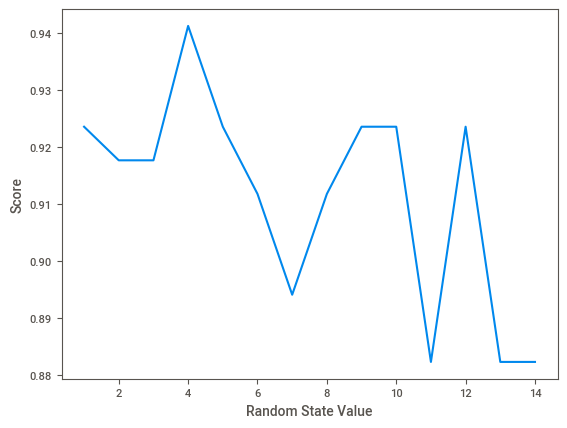

N Estimators= 2


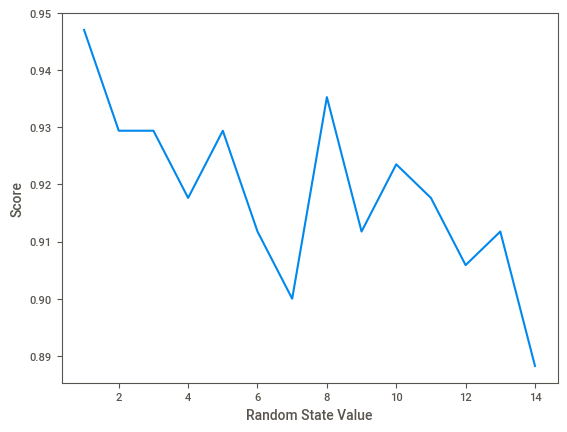

N Estimators= 3


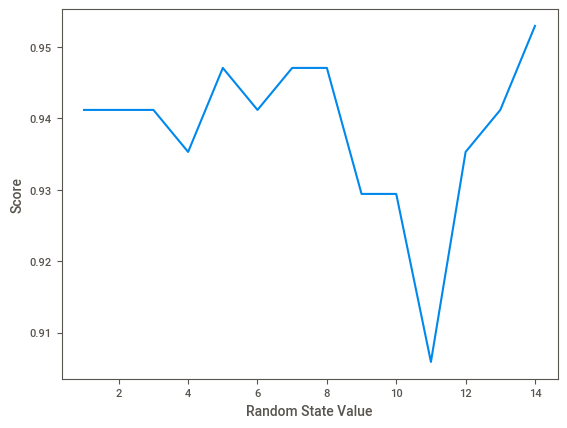

N Estimators= 4


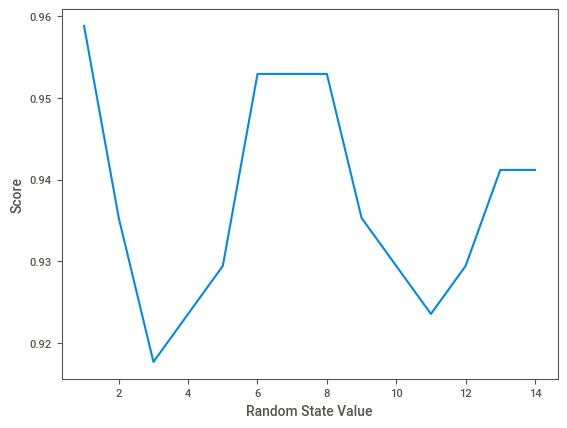

N Estimators= 5


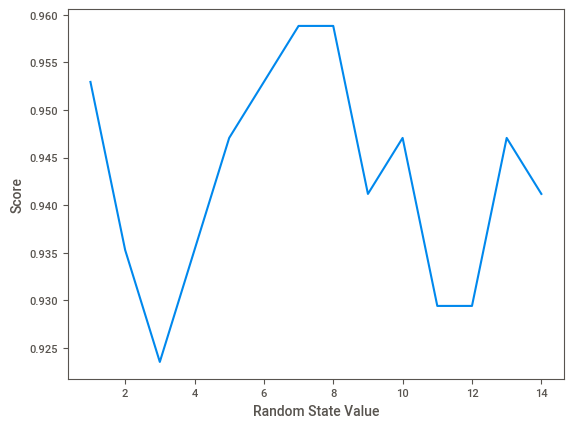

N Estimators= 6


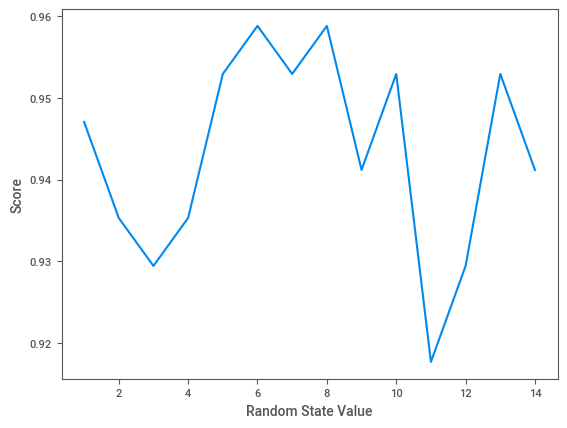

N Estimators= 7


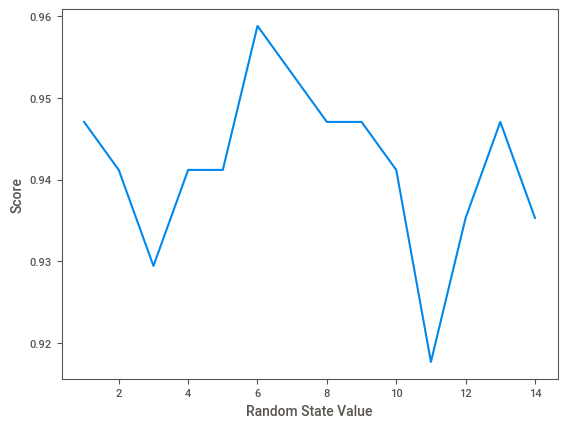

N Estimators= 8


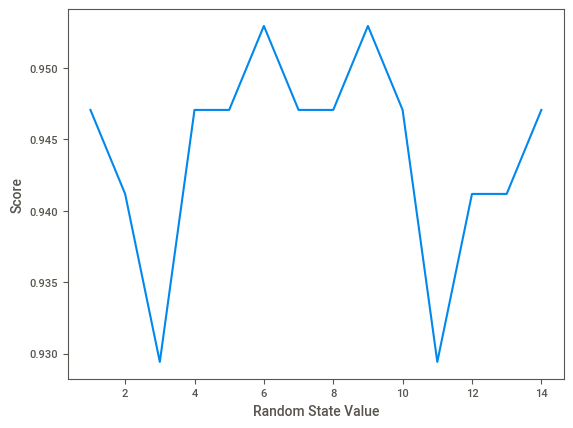

N Estimators= 9


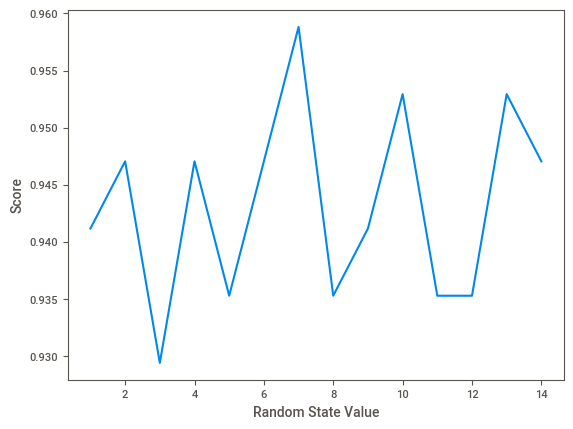

N Estimators= 10


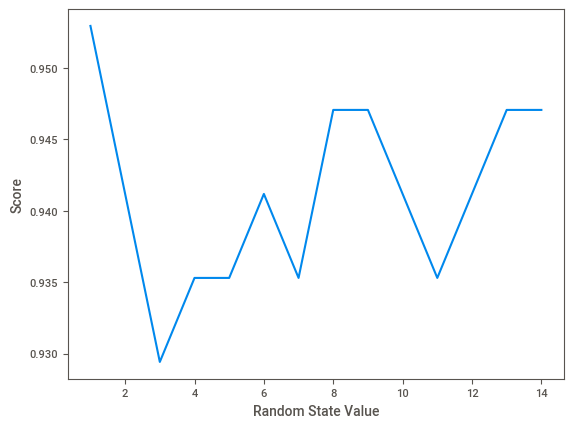

N Estimators= 11


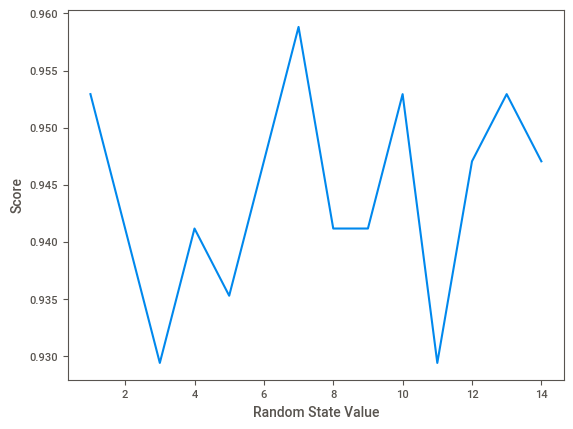

N Estimators= 12


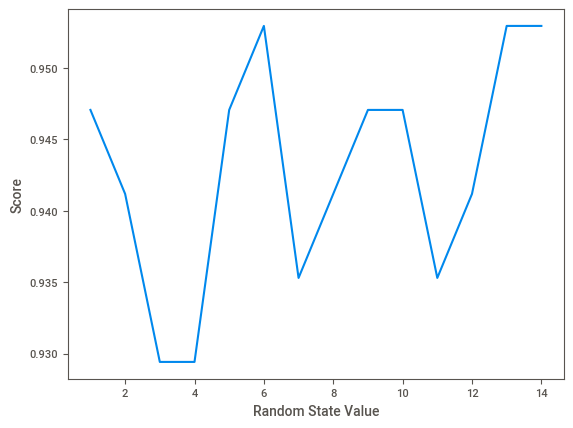

N Estimators= 13


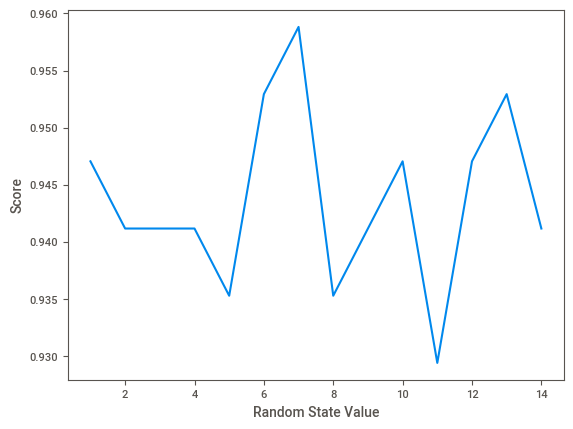

N Estimators= 14


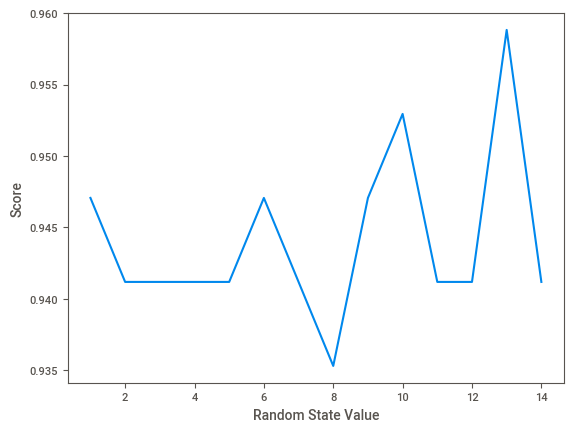

In [36]:
for each in range(1,15):
    score_list_rf = []
    for aech in range(1,15):
        rftest = RandomForestClassifier(n_estimators = each, random_state=aech)
        rftest.fit(x_train,y_train)
        score_list_rf.append(rftest.score(x_test,y_test))
    print('N Estimators=',each)
    plt.plot(range(1,15),score_list_rf)
    plt.xlabel("Random State Value")
    plt.ylabel("Score")
    plt.show()

According to graphs, best outcome is generated by random state=1, n_estimators=4

In [37]:
rf = RandomForestClassifier(n_estimators=4,random_state=1)
rf.fit(x_train,y_train)
print("Score of Random Forest Classifier: ",rf.score(x_test,y_test))
rf_acc_score = rf.score(x_test,y_test)

Score of Random Forest Classifier:  0.9588235294117647


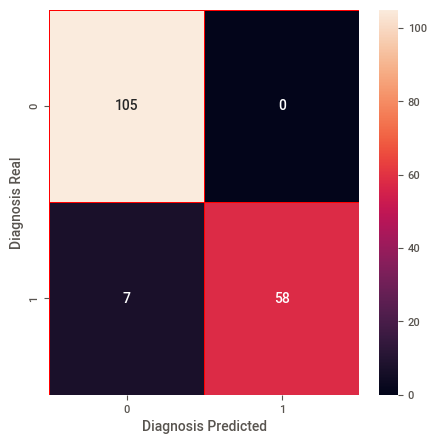

In [38]:
y_pred = rf.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Diagnosis Predicted")
plt.ylabel("Diagnosis Real")
plt.show()

Random Forest Classifier Model had 7 false negatives and 0 false positives